# ADULT WEIGHT PREDICTION IN A TERTIARY HOSPITAL IN GHANA

## Project setup

In [3]:
!pip install h2o -q -U
!pip install --force-reinstall numpy==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 77.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.


In [1]:
# Import packages
import numpy as np # Numeric computation
import pandas as pd # Data manipulation
import matplotlib as mp # Visualisation
import matplotlib.pyplot as plt # Visualisation
import seaborn as sns # Visualisation
import h2o # Automated ML
from h2o.automl import H2OAutoML #Automated ML
# Evaluate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
# Pre-processing and model selection
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
# Machine learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
# System and warnings
import sys
import os
import warnings
# Save models
import joblib

In [2]:
# Print version of libraries
print(f"Python version: {sys.version}")
print("-------------------------------")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mp.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"h2o version: {h2o.__version__}")

Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
-------------------------------
Pandas version: 2.2.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2
h2o version: 3.46.0.6


In [ ]:
# Initialise h2o
h2o.init()

# Prepare Data
## Import

In [ ]:
try:
    df = pd.read_csv('muac.csv')
    display(df.head())
    print(df.shape)
    print(df.info())
except FileNotFoundError:
    print("Error: 'muac.csv' not found. Please ensure the file is in the current directory.")

In [ ]:
# Remove height in metres
del df["height_meters"]

In [ ]:
# Convert sex into a factor
df["sex"] = df["sex"].astype("category")

In [ ]:
df.info()

## Explore

In [4]:
# Histogram of numeric variables
numeric_cols_original = df.select_dtypes(include=np.number).columns
for col in numeric_cols_original:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()

NameError: name 'df' is not defined

In [5]:
# Histogram of numeric variables by sex
numeric_cols_original = df.select_dtypes(include=np.number).columns
for col in numeric_cols_original:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, kde=True, hue=df["sex"])
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()

NameError: name 'df' is not defined

In [6]:
# Histogram of log transformed variables
numeric_cols_log = df.select_dtypes(include=np.number).columns
for col in numeric_cols_log:
    df[f'{col}_log'] = np.log1p(df[col])
    plt.figure(figsize=(8, 6))
    sns.histplot(data =df, x=f'{col}_log', kde=True)
    plt.title(f'Log-transformed Histogram of {col}')
    plt.xlabel(f'Log({col})')
    plt.ylabel('Frequency')
    plt.show()

NameError: name 'df' is not defined

In [7]:
# Calculate descriptive statistics for numerical features
numerical_stats = df.describe()
display(numerical_stats)

# Analyze the distribution of categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts())
    # Bar plot
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')

# Investigate the correlation between numerical features
correlation_matrix = df[numeric_cols_original].corr()
display(correlation_matrix)

# Plot correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:")
print(missing_values)
print("\nMissing Value Percentage:")
print(missing_percentage)

NameError: name 'df' is not defined

In [8]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# Box plot of target variable
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['weight'])
plt.title('Boxplot of Weight')
plt.show()


# Explore relationships between features and target
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='age', y='weight', data=df)
plt.title('Age vs. Weight')

plt.subplot(2, 3, 2)
sns.scatterplot(x='height', y='weight', data=df)
plt.title('Height vs. Weight')

plt.subplot(2, 3, 3)
sns.scatterplot(x='muac', y='weight', data=df)
plt.title('MUAC vs. Weight')

plt.subplot(2, 3, 4)
sns.scatterplot(x='bmi', y='weight', data=df)
plt.title('BMI vs. Weight')

plt.subplot(2, 3, 5)
sns.scatterplot(x='cc', y='weight', data=df)
plt.title('CC vs. Weight')

plt.tight_layout()
plt.show()

print(df[["age", "height", "muac", 'cc', "bmi", "weight"]].corr()['weight'])


# Identify potential outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(['age', 'height', 'muac', 'cc', 'bmi']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Box plot stratified by sex
plt.figure(figsize=(14, 12))
for i, col in enumerate(['age', 'height', 'muac', 'cc', 'bmi']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], hue=df["sex"])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

NameError: name 'warnings' is not defined

## Data cleaning

Detect and handle outliers in 'weight', 'height' 'muac', 'cc' and 'bmi' using the IQR method.  Winsorize the outliers at the 1st and 99th percentiles to limit their influence without removing valid data points.



In [9]:
# Outlier detection and treatment using IQR for 'weight' and 'bmi'
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.01)
    Q3 = column.quantile(0.99)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

columns = ["weight", "height", "muac", "cc", "bmi"]
for col in columns:
  df[col] = handle_outliers_iqr(df[col])
display(df.describe())

NameError: name 'df' is not defined

# Automated Machine Learning

In [10]:
# Select features to retain
features = ["age", "sex", "height", "cc", "muac", "bmi_cat", "weight"]
muac_features = ["age", "sex", "muac", "weight"]
cc_features = ["age", "sex", "cc", "weight"]
cc_muac_features = ["age", "sex", "cc", "muac", "weight"]
cc_muac_bmi = ["age", "sex", "cc", "muac", "bmi_cat", "weight"]


# Training frames
df_full = df[features]
df_muac = df[muac_features]
df_cc = df[cc_features]
df_cc_muac = df[cc_muac_features]
df_cc_muac_bmi = df[cc_muac_bmi]


# Set y target
y = "weight"

NameError: name 'df' is not defined

In [ ]:
# Convert dataframe to H2O frame
df_full = h2o.H2OFrame(df_full)

# Convert sex into a factor
df_full["sex"] = df_full["sex"].asfactor()
df_full["bmi_cat"] = df_full["bmi_cat"].asfactor()

In [11]:
# Split into train & test
splits = df_full.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

NameError: name 'df_full' is not defined

In [12]:
model_full = H2OAutoML(max_runtime_secs=600, seed=1, project_name="weight_prediction_full")
model_full.train(y=y, training_frame=train)

NameError: name 'H2OAutoML' is not defined

In [13]:
# # Explain leader model & compare with all AutoML models
# exa = model_full.explain(test, columns=features)

# # Explain a single H2O model (e.g. leader model from AutoML)
# exm = model_full.leader.explain(test, columns=features)


# Explain leader model & compare with all AutoML models
exa = h2o.explain(model_full, test)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = h2o.explain(model_full, test)

NameError: name 'h2o' is not defined

In [19]:
model_full.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20250318_112101,4.37248,19.1186,3.20905,0.0665917,19.1186
StackedEnsemble_AllModels_6_AutoML_1_20250318_112101,4.44329,19.7428,3.23165,0.0670282,19.7428
DeepLearning_grid_1_AutoML_1_20250318_112101_model_1,4.46071,19.898,3.28316,0.0679812,19.898
StackedEnsemble_BestOfFamily_6_AutoML_1_20250318_112101,4.4927,20.1843,3.26983,0.0669415,20.1843
GBM_lr_annealing_selection_AutoML_1_20250318_112101_select_model,4.71553,22.2363,3.3566,0.0712469,22.2363
GBM_grid_1_AutoML_1_20250318_112101_model_170,4.73577,22.4275,3.32386,0.0709102,22.4275
GBM_grid_1_AutoML_1_20250318_112101_model_42,4.7386,22.4543,3.40016,0.0713492,22.4543
GBM_grid_1_AutoML_1_20250318_112101_model_172,4.74017,22.4692,3.35129,0.0706266,22.4692
StackedEnsemble_AllModels_3_AutoML_1_20250318_112101,4.74335,22.4994,3.37239,0.0723245,22.4994
StackedEnsemble_AllModels_4_AutoML_1_20250318_112101,4.74368,22.5025,3.39123,0.0723918,22.5025


In [20]:
# Save full model
h2o.save_model(model_full.leader,  path="muac_model", force=True)

'/content/muac_model/StackedEnsemble_BestOfFamily_4_AutoML_1_20250318_112101'

## MUAC model

In [23]:
# Convert dataframe to H2O frame
df_muac = h2o.H2OFrame(df_muac)

# Split into train & test
splits = df_muac.split_frame(ratios = [0.8], seed = 1)
train_muac = splits[0]
test_muac = splits[1]

In [24]:
model_muac = H2OAutoML(max_runtime_secs=600, seed=1, project_name="weight_prediction_muac")
model_muac.train(y=y, training_frame=train_muac)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20250318_113646


GLM Model: summary
    family    link      regularization               lambda_search                                                                  number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  -----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.007251 )  nlambda = 30, lambda.max = 1078.5, lambda.min = 0.007251, lambda.1se = 0.2035  4                             4                              26                      AutoML_2_20250318_113646_training_py_57_sid_8ade

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 67.3699319274469
RMSE: 8.20791885482836
MAE: 6.306322629151613
RMSLE: 0.12366582129290137
Mean Residual Deviance: 67.3699319274469
R^2: 0.6354692456336678
Null degrees of freedom: 311
Residual degrees of freedom: 307
Null deviance: 57661.578644860085
Residual deviance: 21019.41876136343
AIC: 2210.999671737375

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 68.93128664012083
RMSE: 8.302486774462265
MAE: 6.394405626278405
RMSLE: 0.12493402931086632
Mean Residual Deviance: 68.93128664012083
R^2: 0.6270209394685908
Null degrees of freedom: 311
Residual degrees of freedom: 307
Null deviance: 57734.601580097966
Residual deviance: 21506.5614317177
AIC: 2218.148015456545

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     451.419   13.3528     445.623       452.469       472.812       449.511       436.681
loglikelihood           0         0           0             0             0             0             0
mae                     6.40937   0.435659    6.12613       6.53027       6.99753       6.5339        5.859
mean_residual_deviance  68.5846   17.7188     57.1131       63.6692       98.9453       67.9485       55.247
mse                     68.5846   17.7188     57.1131       63.6692       98.9453       67.9485       55.247
null_deviance           11546.9   3190.77     9595.14       10042.9       17151.9       9791.27       11153.4
r2                      0.624857  0.0461794   0.622166      0.600593      0.640603      0.568724      0.692202
residual_deviance       4276.4    1085.33     3598.12       4011.16       6134.61       4212.81       3425.32
rmse                    8.23193   1.01236     7.55732       7.9793        9.94712       8.24309       7.43284
rmsle                   0.124761  0.00863507  0.117664      0.121901      0.134408      0.133477      0.116354

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train      deviance_xval       deviance_se         alpha    iterations    training_rmse     training_deviance    training_mae       training_r2
---  -------------------  ----------  -----------  --------  ------------  ------------------  ------------------  ------------------  -------  ------------  ----------------  -------------------  -----------------  ------------------
     2025-03-18 11:36:49  0.000 sec   1            .11E4     5             184.5954677743758   185.0618488290937   23.303773350443482  0.0
     2025-03-18 11:36:49  0.000 sec   2            .67E3     5             184.46316487319658  184.95629950435497  23.290796490484748  0.0
     2025-03-18 11:36:49  0.001 sec   3            .42E3     5             184.25059438270713  184.78663903635766  23.269937688573457  0.0
     2025-03-18 11:36:49  0.001 sec   4            .26E3   

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_2_20250318_113646_model_29,8.94908,80.086,6.78661,0.121784,80.086,51,0.013576,GBM
GBM_grid_1_AutoML_2_20250318_113646_model_2,8.97837,80.6111,6.80388,0.122794,80.6111,38,0.014782,GBM
DeepLearning_grid_2_AutoML_2_20250318_113646_model_2,9.00024,81.0044,6.83398,0.122791,81.0044,87,0.012908,DeepLearning
StackedEnsemble_Best1000_1_AutoML_2_20250318_113646,9.03345,81.6032,6.93042,0.124052,81.6032,389,0.264077,StackedEnsemble
DeepLearning_grid_1_AutoML_2_20250318_113646_model_15,9.049,81.8844,6.92169,0.125004,81.8844,55,0.007374,DeepLearning
DeepLearning_grid_1_AutoML_2_20250318_113646_model_6,9.06166,82.1137,6.90587,0.125016,82.1137,40,0.007749,DeepLearning
StackedEnsemble_AllModels_3_AutoML_2_20250318_113646,9.07811,82.412,6.98278,0.124298,82.412,245,0.185661,StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_2_20250318_113646,9.08191,82.4811,6.98566,0.124328,82.4811,373,0.190138,StackedEnsemble
DeepLearning_grid_2_AutoML_2_20250318_113646_model_9,9.08727,82.5785,7.01115,0.123564,82.5785,233,0.034133,DeepLearning
DeepLearning_grid_3_AutoML_2_20250318_113646_model_3,9.1009,82.8263,6.9452,0.124315,82.8263,52,0.006442,DeepLearning


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

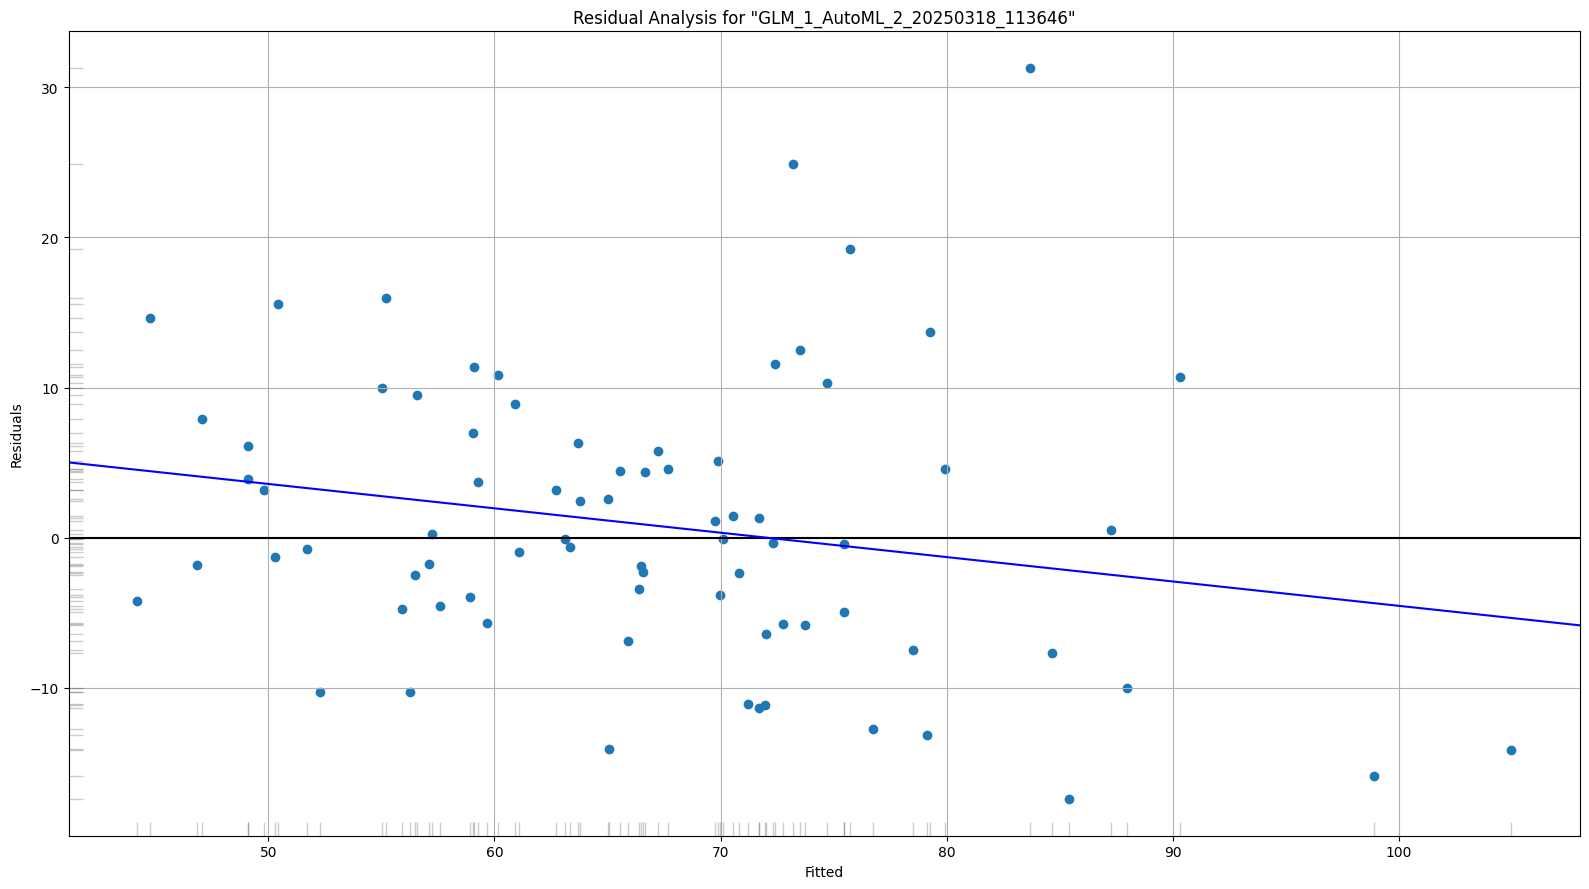

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

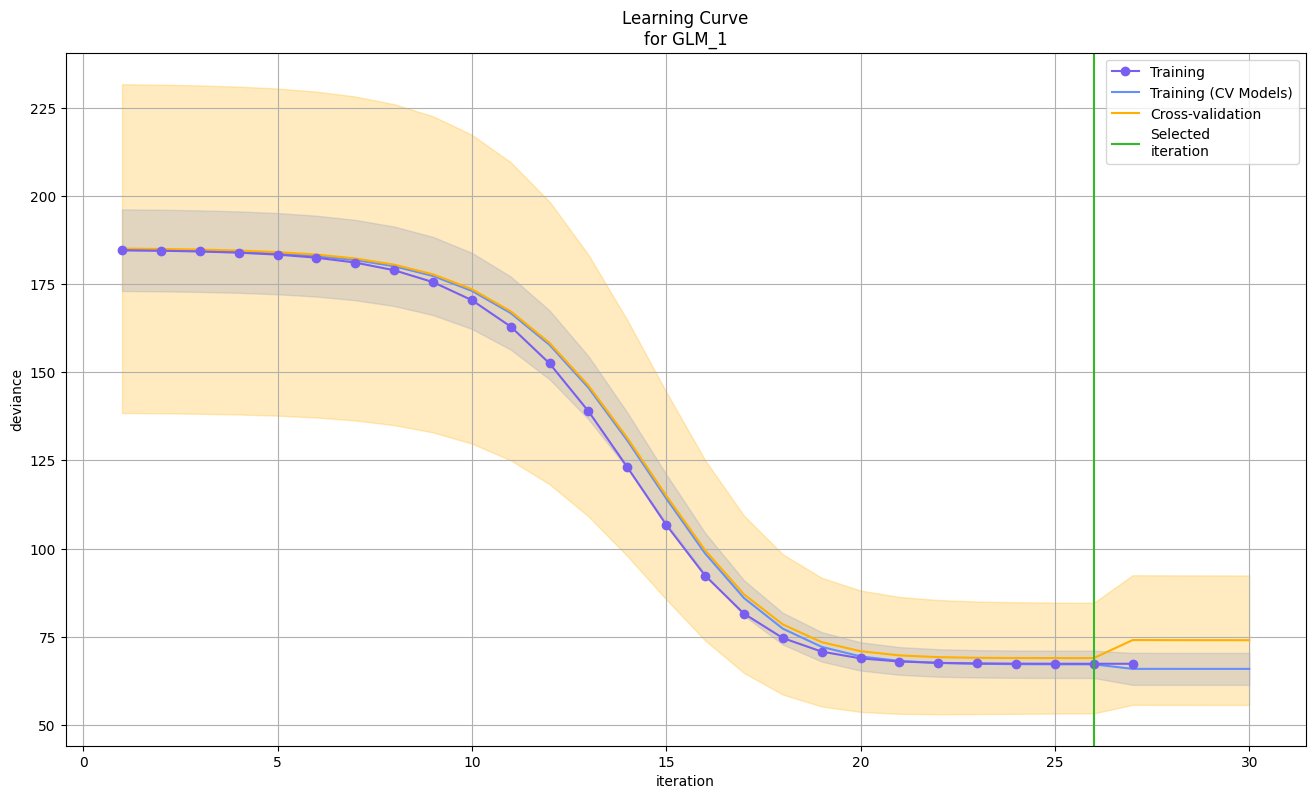

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

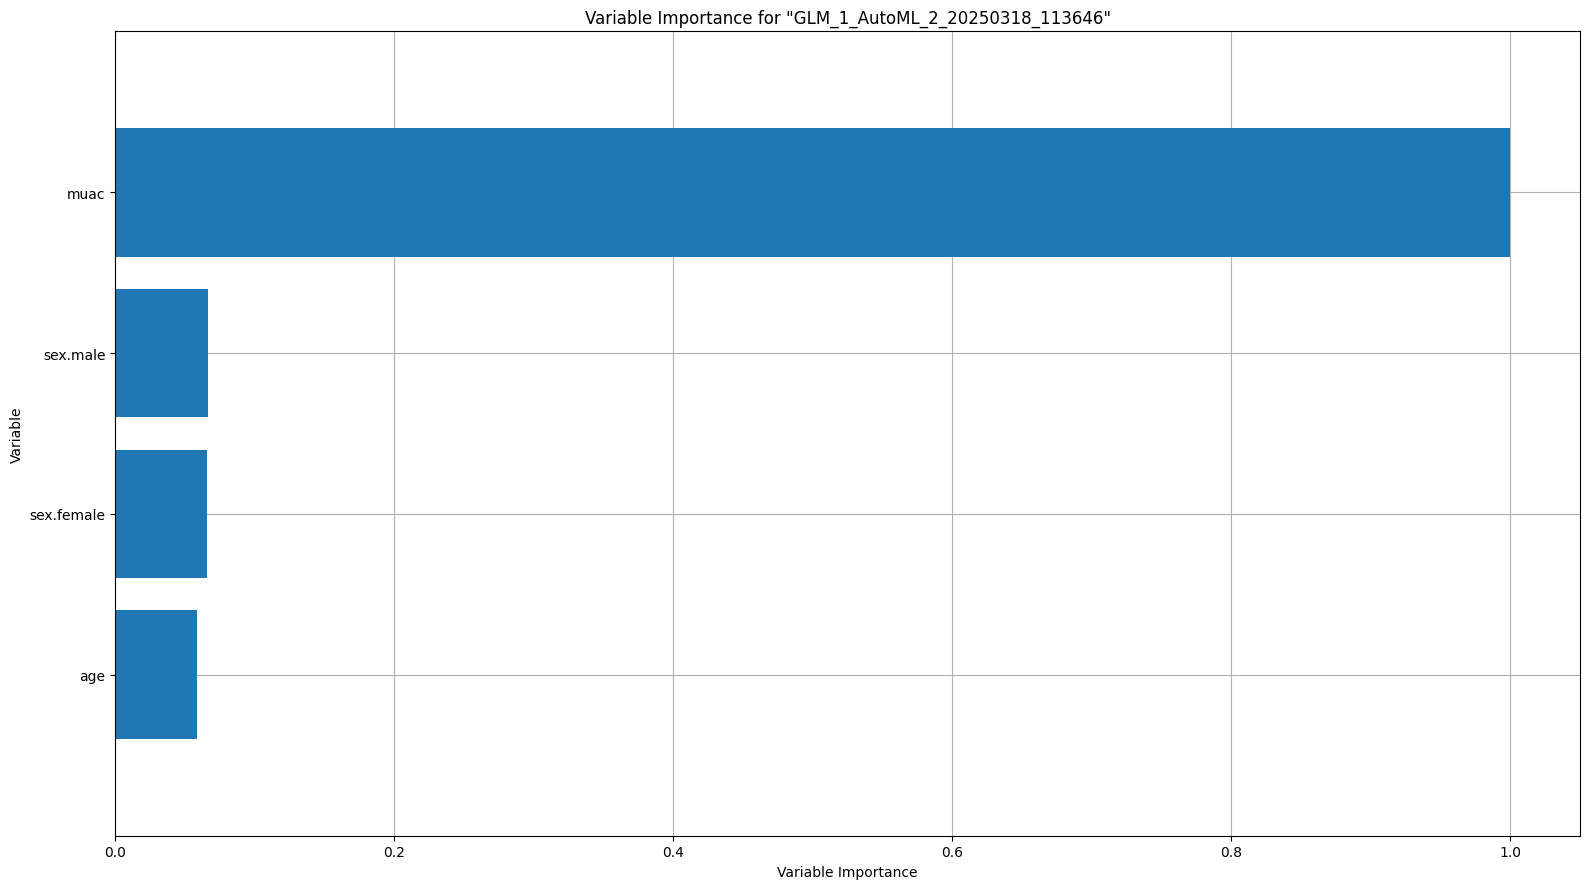

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

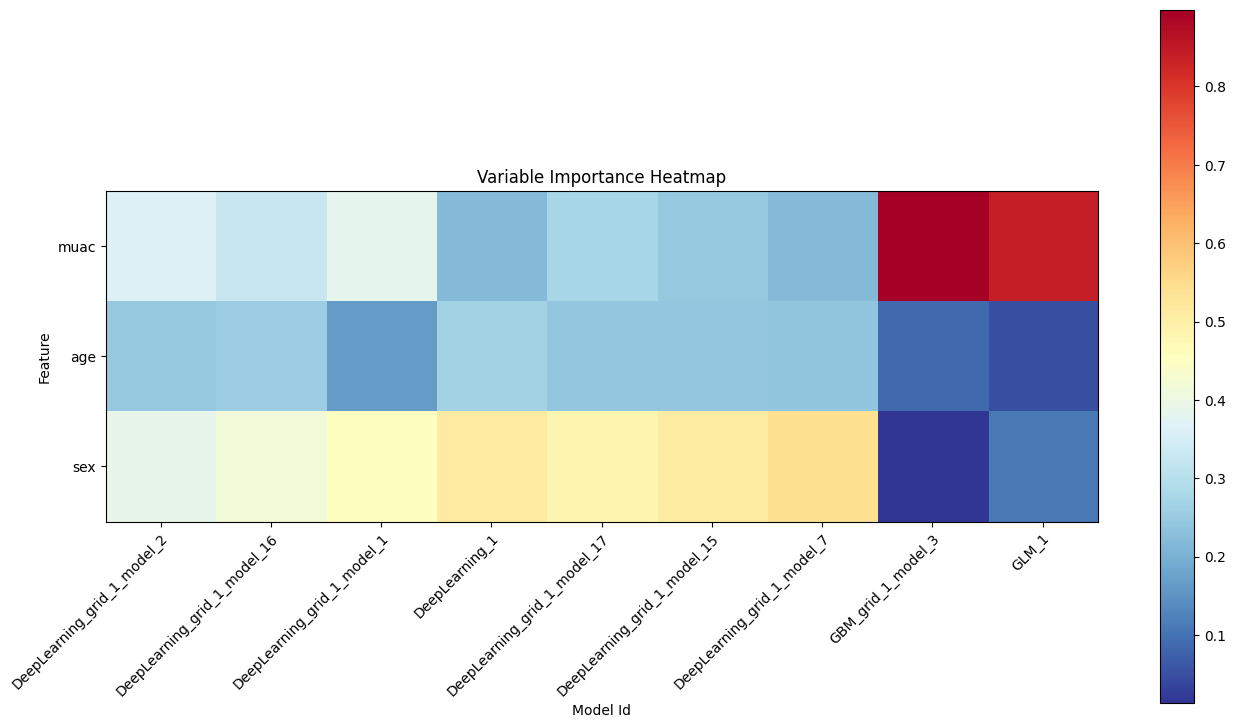

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

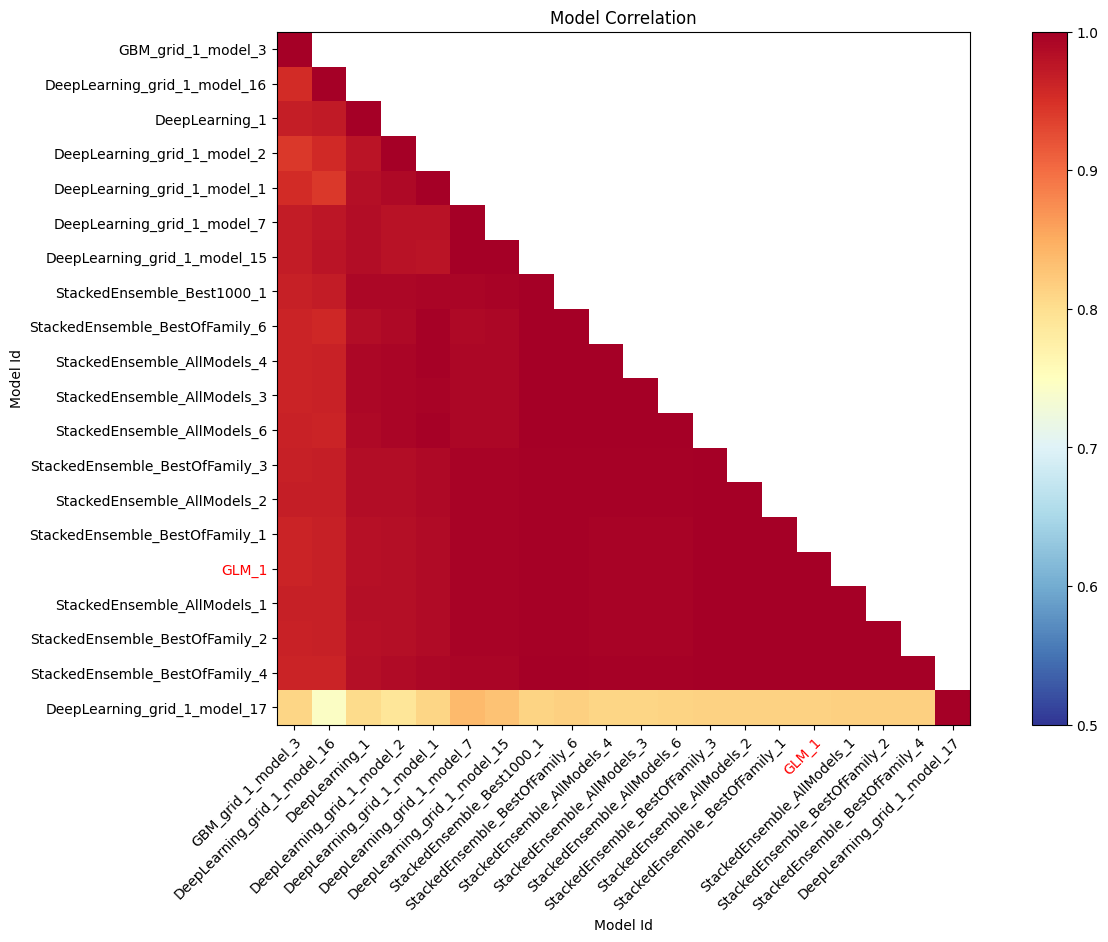

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Incorrect number of arguments; 'cols_py' expects 2 but was passed 3
  Request: POST /99/Rapids
    data: {'ast': "(tmp= py_97_sid_8ade (levels (tmp= py_96_sid_8ade (as.factor (cols_py py_95_sid_8ade np.str_('sex'))))))", 'session_id': '_sid_8ade'}


In [25]:
# Explain leader model & compare with all AutoML models
exa = model_muac.explain(test_muac)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = model_muac.leader.explain(test_muac)

In [26]:
model_muac.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GLM_1_AutoML_2_20250318_113646,8.30249,68.9313,6.39441,0.124934,68.9313
StackedEnsemble_AllModels_6_AutoML_2_20250318_113646,8.30711,69.008,6.37374,0.124237,69.008
DeepLearning_grid_1_AutoML_2_20250318_113646_model_1,8.33428,69.4603,6.43101,0.124531,69.4603
StackedEnsemble_BestOfFamily_4_AutoML_2_20250318_113646,8.33539,69.4788,6.3714,0.125025,69.4788
StackedEnsemble_BestOfFamily_2_AutoML_2_20250318_113646,8.35217,69.7587,6.41945,0.125504,69.7587
StackedEnsemble_BestOfFamily_1_AutoML_2_20250318_113646,8.39565,70.4869,6.4539,0.126322,70.4869
StackedEnsemble_BestOfFamily_6_AutoML_2_20250318_113646,8.40806,70.6955,6.42951,0.125742,70.6955
StackedEnsemble_AllModels_2_AutoML_2_20250318_113646,8.4166,70.8392,6.46075,0.125704,70.8392
StackedEnsemble_AllModels_1_AutoML_2_20250318_113646,8.43701,71.1831,6.49579,0.126409,71.1831
StackedEnsemble_BestOfFamily_3_AutoML_2_20250318_113646,8.46362,71.6328,6.5008,0.126744,71.6328


In [27]:
# Save muac model
h2o.save_model(model_muac.leader,  path="muac_model", force=True)

'/content/muac_model/GLM_1_AutoML_2_20250318_113646'

## CC Model

In [28]:
# Convert dataframe to H2O frame
df_cc = h2o.H2OFrame(df_cc)

# Split into train & test
splits = df_cc.split_frame(ratios = [0.8], seed = 1)
train_cc = splits[0]
test_cc = splits[1]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [29]:
model_cc = H2OAutoML(max_runtime_secs=600, seed=1, project_name="weight_prediction_cc")
model_cc.train(y=y, training_frame=train_cc)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/8
# GBM base models (used / total),1/4
# XGBoost base models (used / total),1/2
# GLM base models (used / total),1/1
# DRF base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
DeepLearning_grid_2_AutoML_3_20250318_115436_model_9,8.41358,70.7883,6.4829,0.121299,70.7883,222,0.022557,DeepLearning
GBM_grid_1_AutoML_3_20250318_115436_model_3,8.54348,72.9911,6.56463,0.121561,72.9911,49,0.014673,GBM
DeepLearning_grid_2_AutoML_3_20250318_115436_model_2,8.569,73.4277,6.48186,0.120568,73.4277,150,0.013792,DeepLearning
DeepLearning_grid_1_AutoML_3_20250318_115436_model_3,8.60908,74.1163,6.62298,0.121449,74.1163,8571,0.004515,DeepLearning
DeepLearning_grid_2_AutoML_3_20250318_115436_model_4,8.61776,74.2657,6.66907,0.12713,74.2657,58,0.041375,DeepLearning
DeepLearning_grid_3_AutoML_3_20250318_115436_model_1,8.69341,75.5753,6.79783,0.126344,75.5753,11412,0.041378,DeepLearning
DeepLearning_1_AutoML_3_20250318_115436,8.72044,76.046,6.65226,0.121869,76.046,32,0.005669,DeepLearning
DeepLearning_grid_2_AutoML_3_20250318_115436_model_1,8.75305,76.6159,6.72586,0.124023,76.6159,11392,0.034732,DeepLearning
DeepLearning_grid_3_AutoML_3_20250318_115436_model_3,8.78836,77.2353,6.55559,0.124462,77.2353,52,0.006246,DeepLearning
StackedEnsemble_BestOfFamily_1_AutoML_3_20250318_115436,8.80121,77.4614,6.68302,0.131942,77.4614,111,0.038663,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

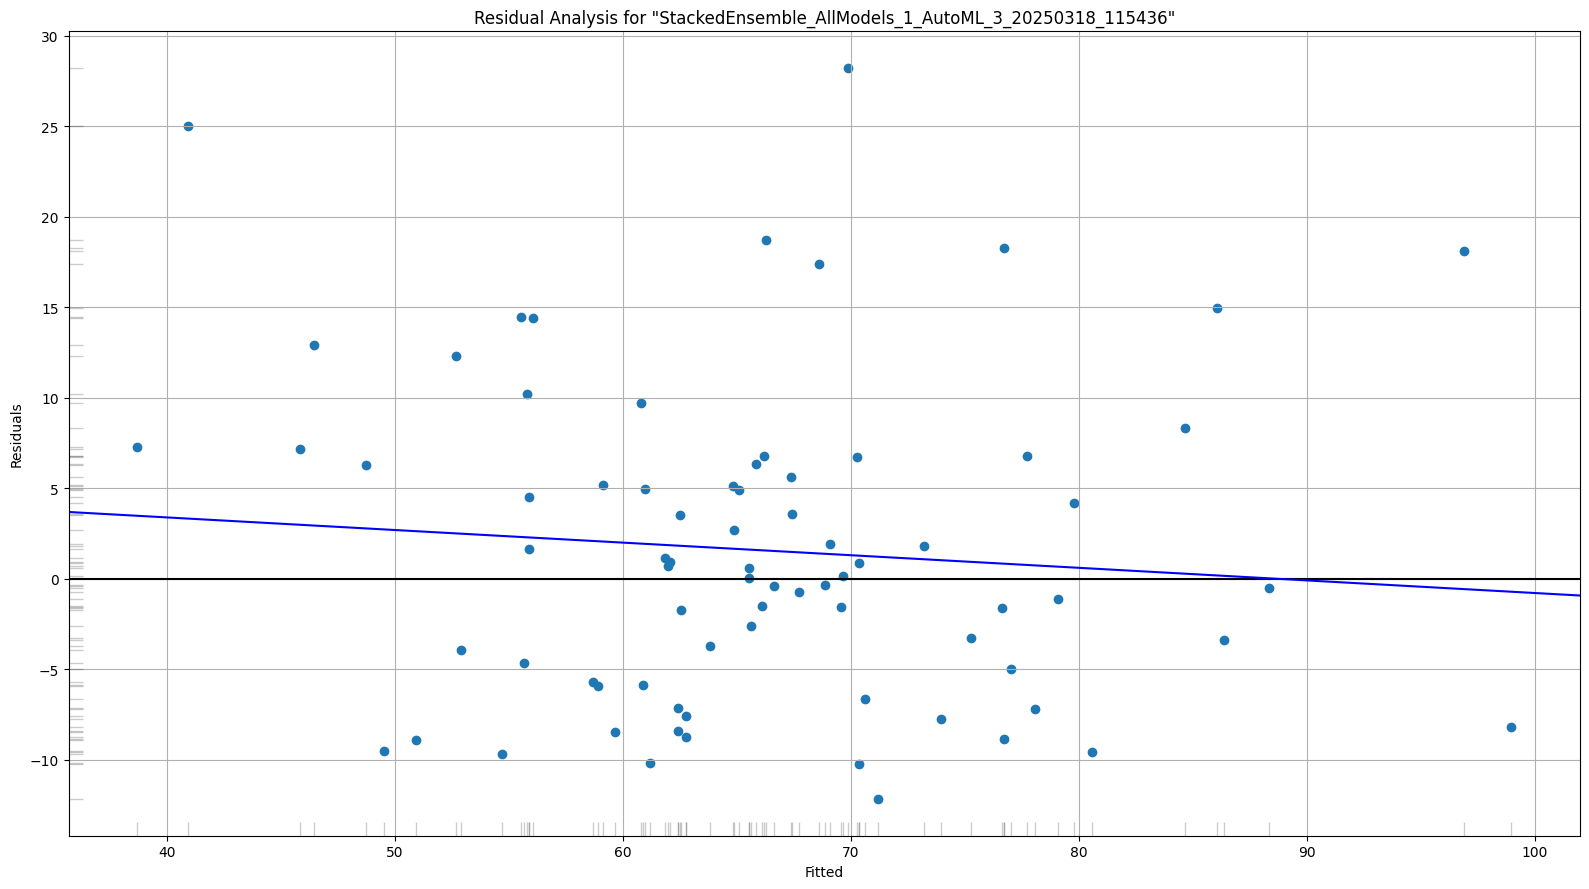

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

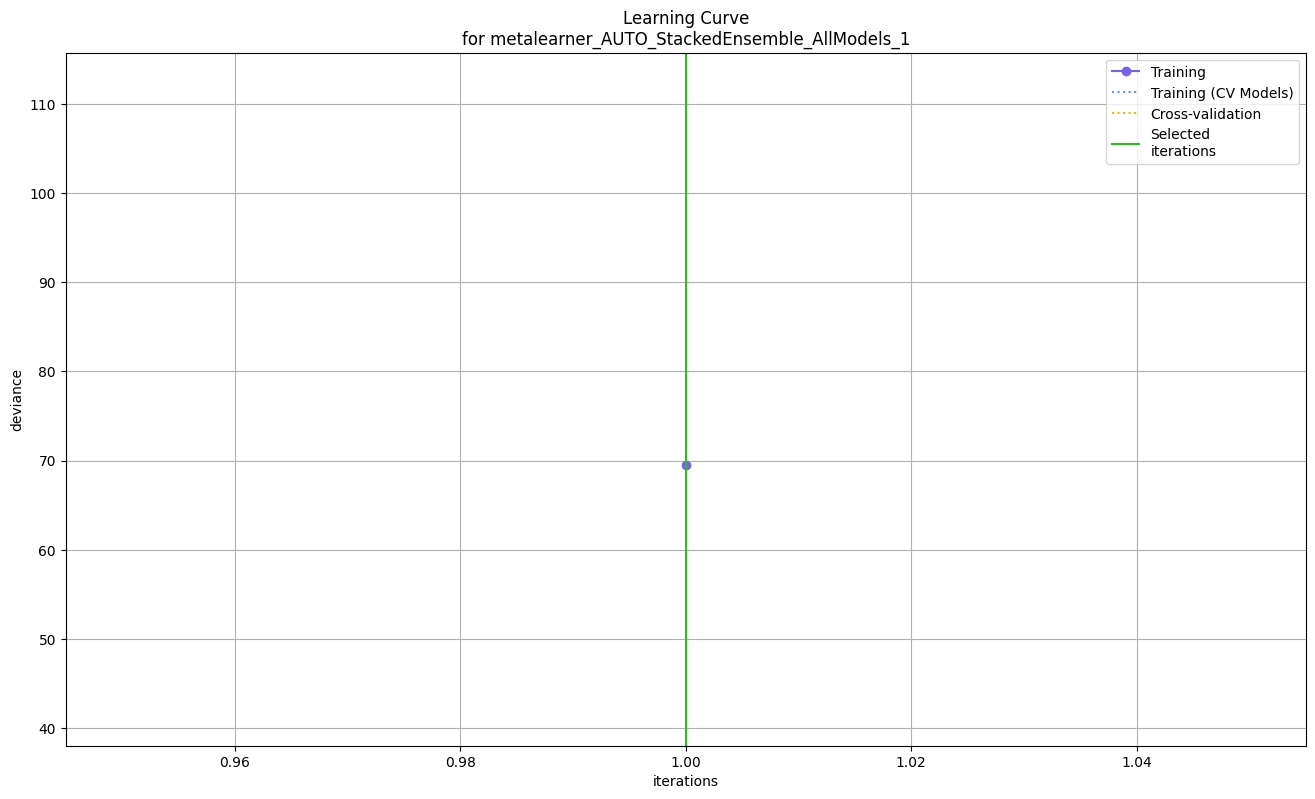

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

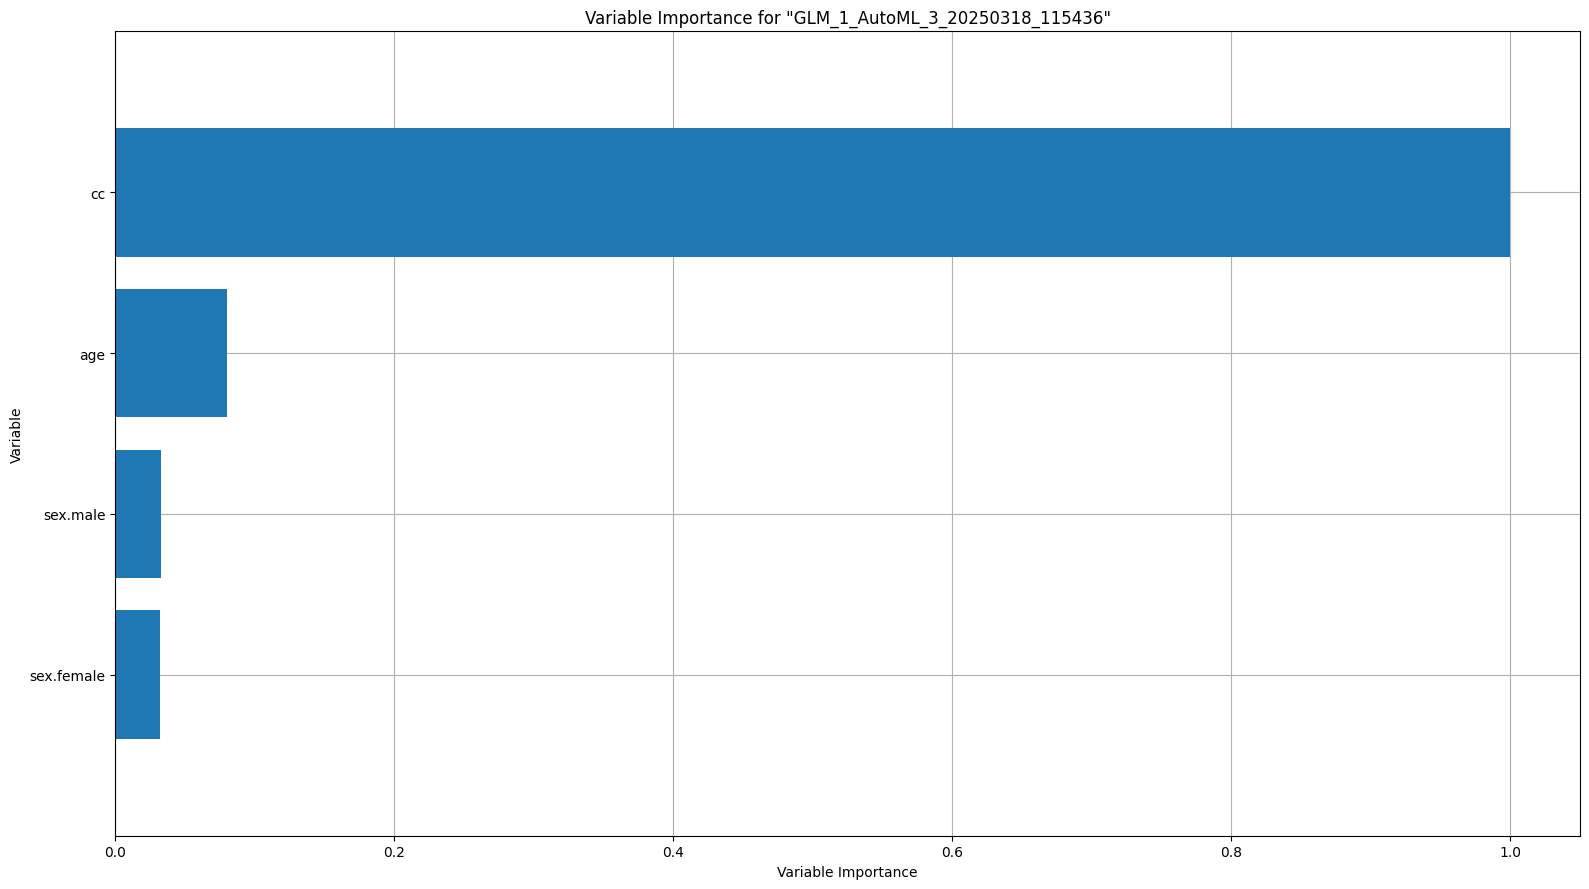

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

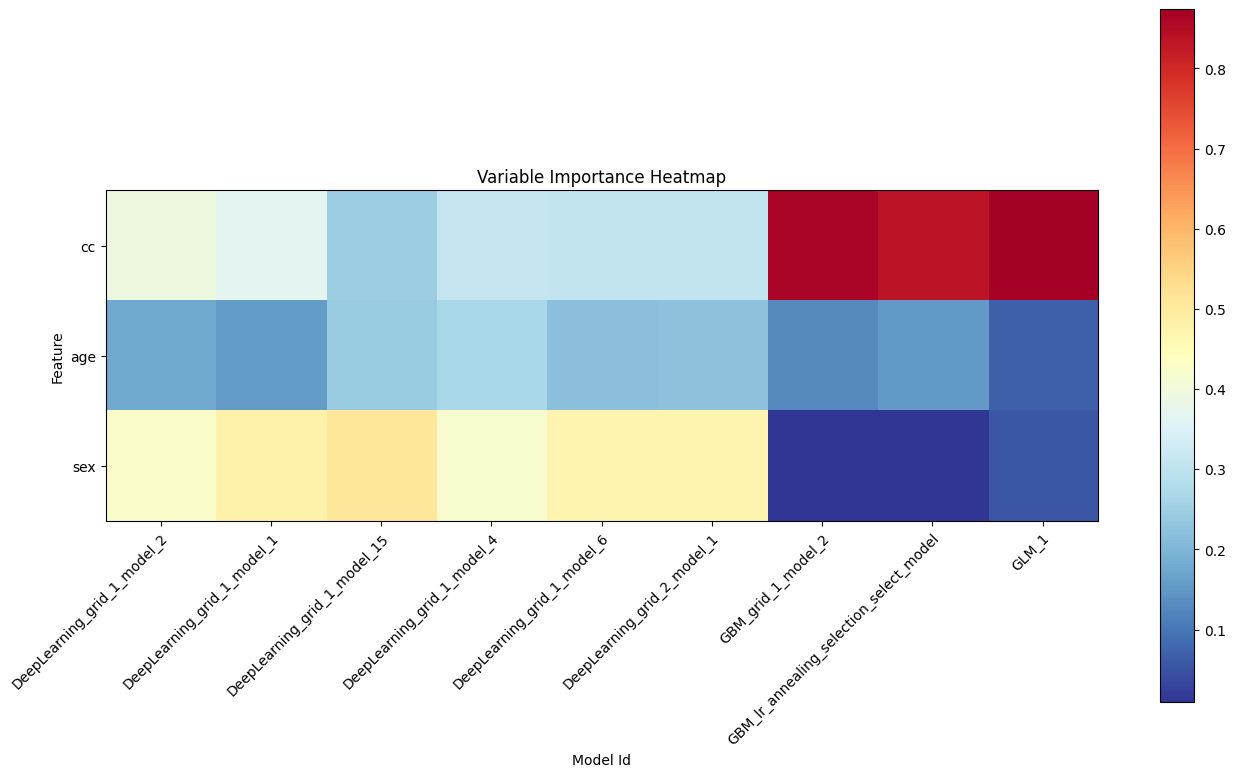

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

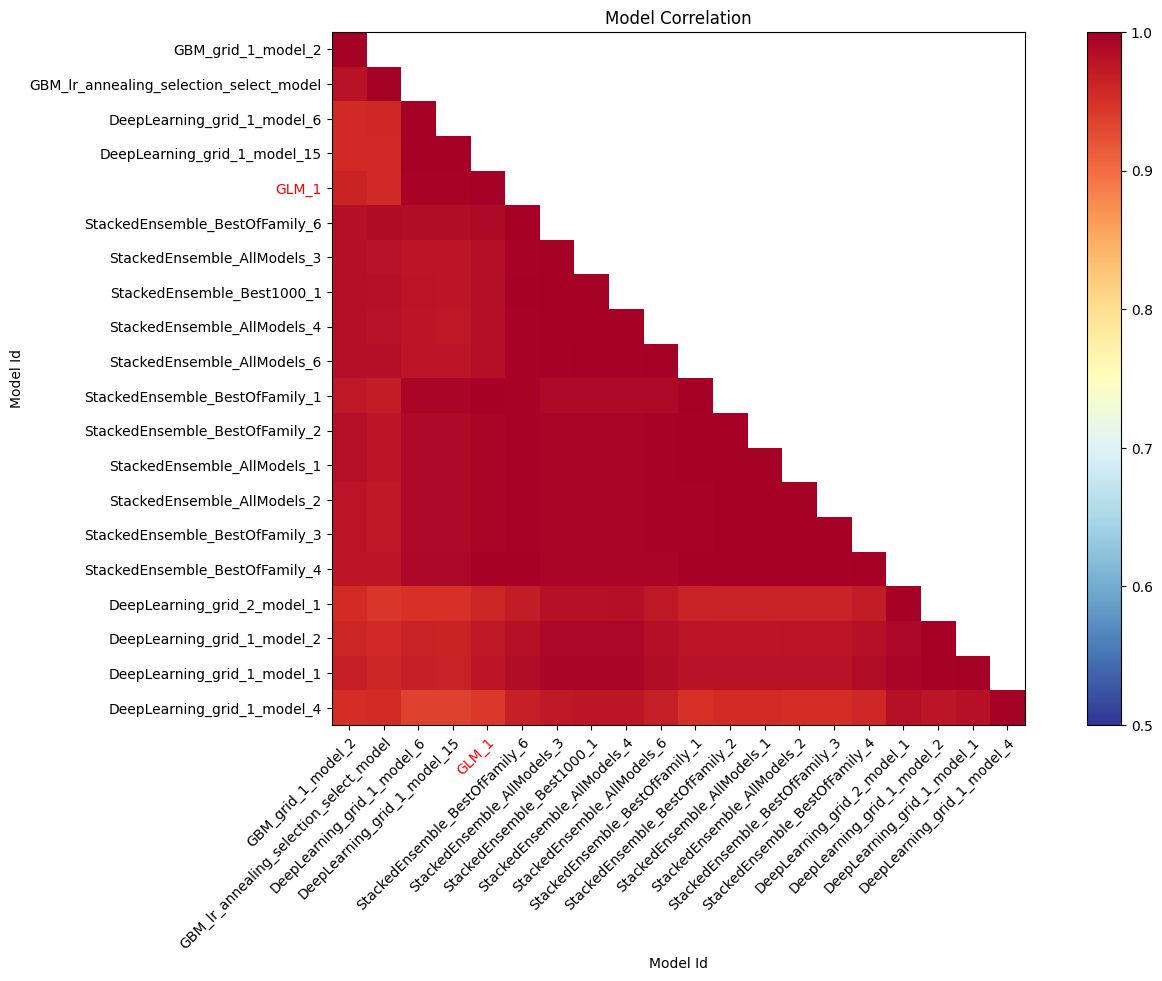

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Incorrect number of arguments; 'cols_py' expects 2 but was passed 3
  Request: POST /99/Rapids
    data: {'ast': "(tmp= py_141_sid_8ade (levels (tmp= py_140_sid_8ade (as.factor (cols_py py_139_sid_8ade np.str_('sex'))))))", 'session_id': '_sid_8ade'}


In [30]:
# Explain leader model & compare with all AutoML models
exa = model_cc.explain(test_cc)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = model_cc.leader.explain(test_cc)

In [31]:
model_cc.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20250318_115436,8.42284,70.9442,6.33114,0.129391,70.9442
StackedEnsemble_BestOfFamily_4_AutoML_3_20250318_115436,8.44311,71.2862,6.30649,0.130115,71.2862
StackedEnsemble_BestOfFamily_6_AutoML_3_20250318_115436,8.44975,71.3983,6.33932,0.129573,71.3983
StackedEnsemble_BestOfFamily_3_AutoML_3_20250318_115436,8.47113,71.7601,6.39823,0.130336,71.7601
StackedEnsemble_AllModels_2_AutoML_3_20250318_115436,8.51338,72.4776,6.45314,0.130146,72.4776
GLM_1_AutoML_3_20250318_115436,8.51463,72.499,6.39133,0.131905,72.499
StackedEnsemble_BestOfFamily_2_AutoML_3_20250318_115436,8.52686,72.7073,6.40105,0.130752,72.7073
DeepLearning_grid_1_AutoML_3_20250318_115436_model_1,8.56032,73.2791,6.47787,0.132992,73.2791
StackedEnsemble_AllModels_6_AutoML_3_20250318_115436,8.576,73.5478,6.51727,0.131634,73.5478
GBM_lr_annealing_selection_AutoML_3_20250318_115436_select_model,8.59162,73.816,6.52967,0.131154,73.816


In [32]:
# Save cc model
h2o.save_model(model_cc.leader,  path="muac_model", force=True)

'/content/muac_model/StackedEnsemble_AllModels_1_AutoML_3_20250318_115436'

## CC-MUAC

In [33]:
# Convert dataframe to H2O frame
df_cc_muac = h2o.H2OFrame(df_cc_muac)

# Split into train & test
splits = df_cc_muac.split_frame(ratios = [0.8], seed = 1)
train_cc_muac = splits[0]
test_cc_muac = splits[1]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [34]:
model_cc_muac = H2OAutoML(max_runtime_secs=600, seed=1, project_name="weight_prediction_cc_muac")
model_cc_muac.train(y=y, training_frame=train_cc_muac)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_4_20250318_122518_model_61,7.87539,62.0217,6.01872,0.111441,62.0217,199,0.008248,XGBoost
GBM_grid_1_AutoML_4_20250318_122518_model_26,7.9317,62.9119,5.92904,0.110692,62.9119,55,0.018349,GBM
XGBoost_grid_1_AutoML_4_20250318_122518_model_30,8.01336,64.214,5.97505,0.115078,64.214,224,0.011517,XGBoost
XGBoost_grid_1_AutoML_4_20250318_122518_model_125,8.04019,64.6447,5.96985,0.114995,64.6447,302,0.00938,XGBoost
GBM_grid_1_AutoML_4_20250318_122518_model_23,8.07239,65.1634,6.25258,0.113409,65.1634,55,0.023637,GBM
XGBoost_grid_1_AutoML_4_20250318_122518_model_9,8.08325,65.3389,5.96454,0.1144,65.3389,200,0.008276,XGBoost
XGBoost_grid_1_AutoML_4_20250318_122518_model_51,8.11201,65.8047,5.95504,0.116734,65.8047,208,0.00843,XGBoost
GBM_grid_1_AutoML_4_20250318_122518_model_3,8.13281,66.1426,6.18427,0.112916,66.1426,54,0.018988,GBM
XGBoost_grid_1_AutoML_4_20250318_122518_model_21,8.15029,66.4272,6.06139,0.115178,66.4272,328,0.008475,XGBoost
XGBoost_grid_1_AutoML_4_20250318_122518_model_19,8.15933,66.5746,6.00822,0.117759,66.5746,456,0.010683,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

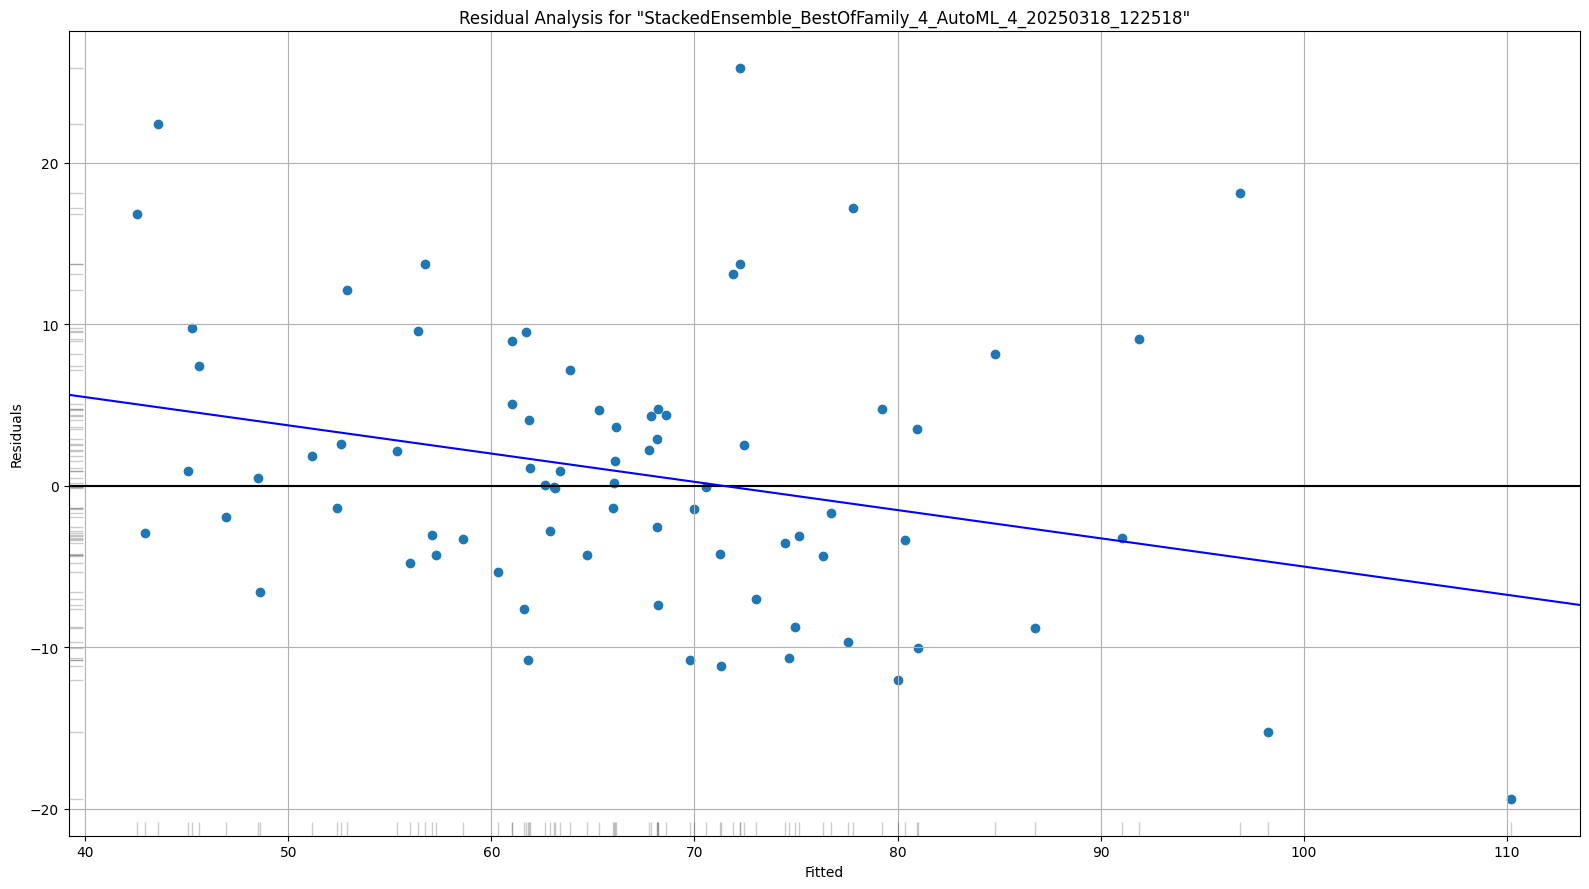

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

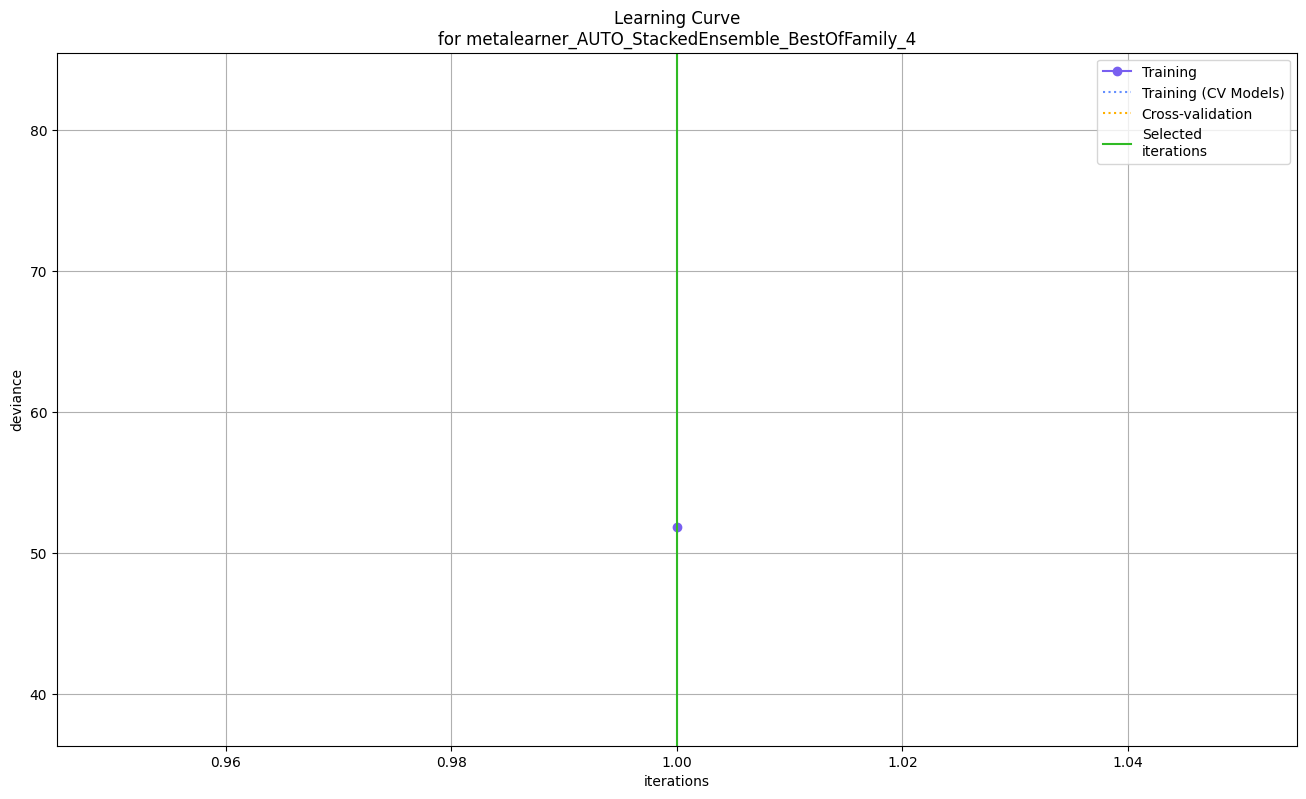

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

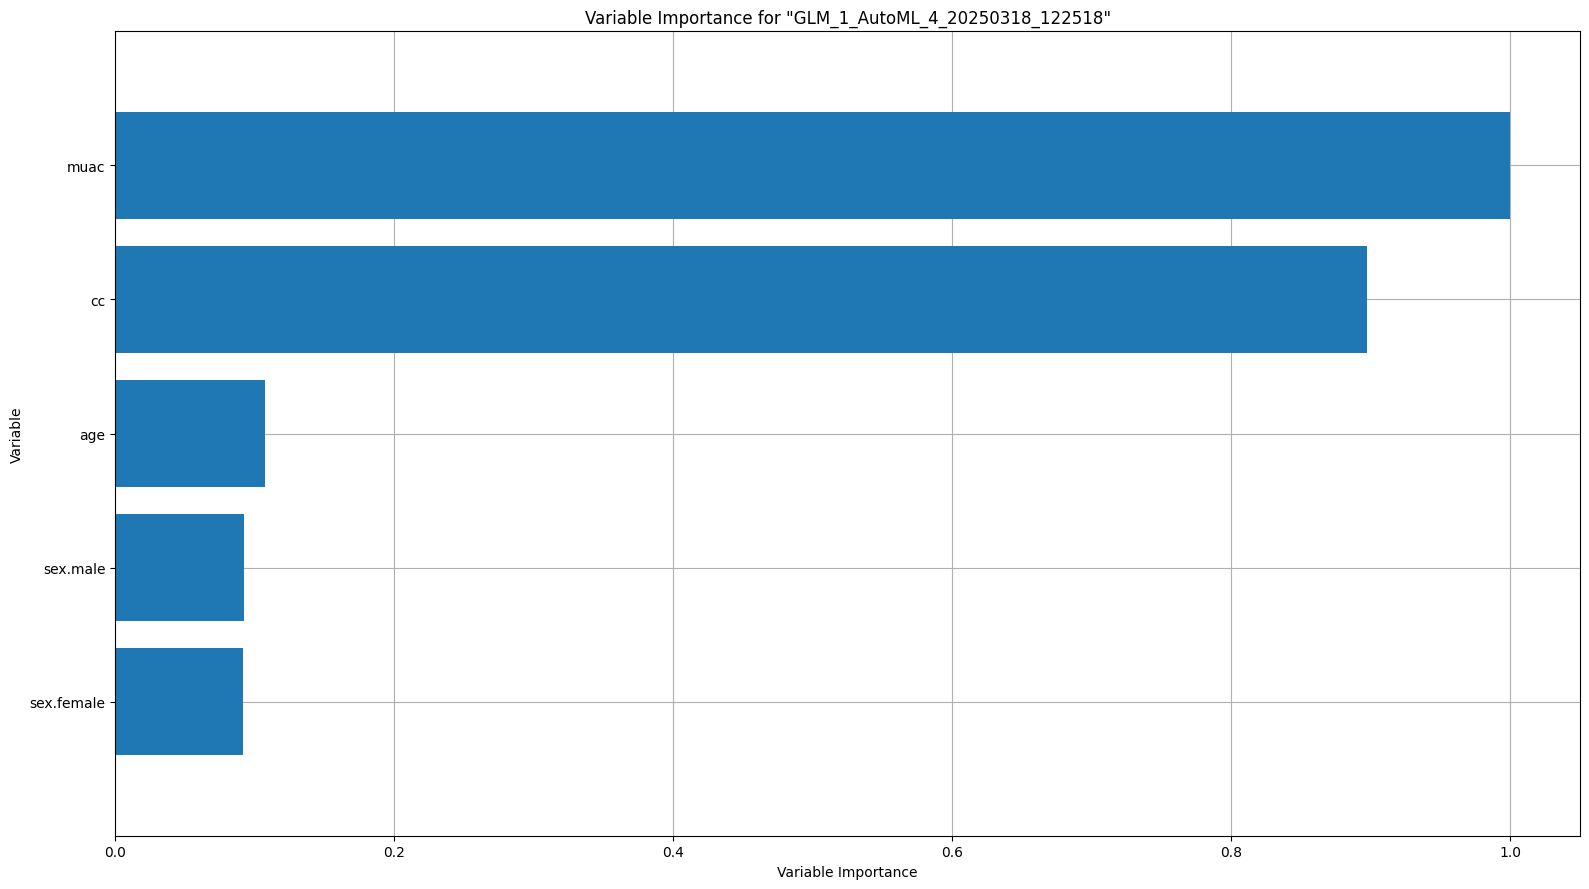

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

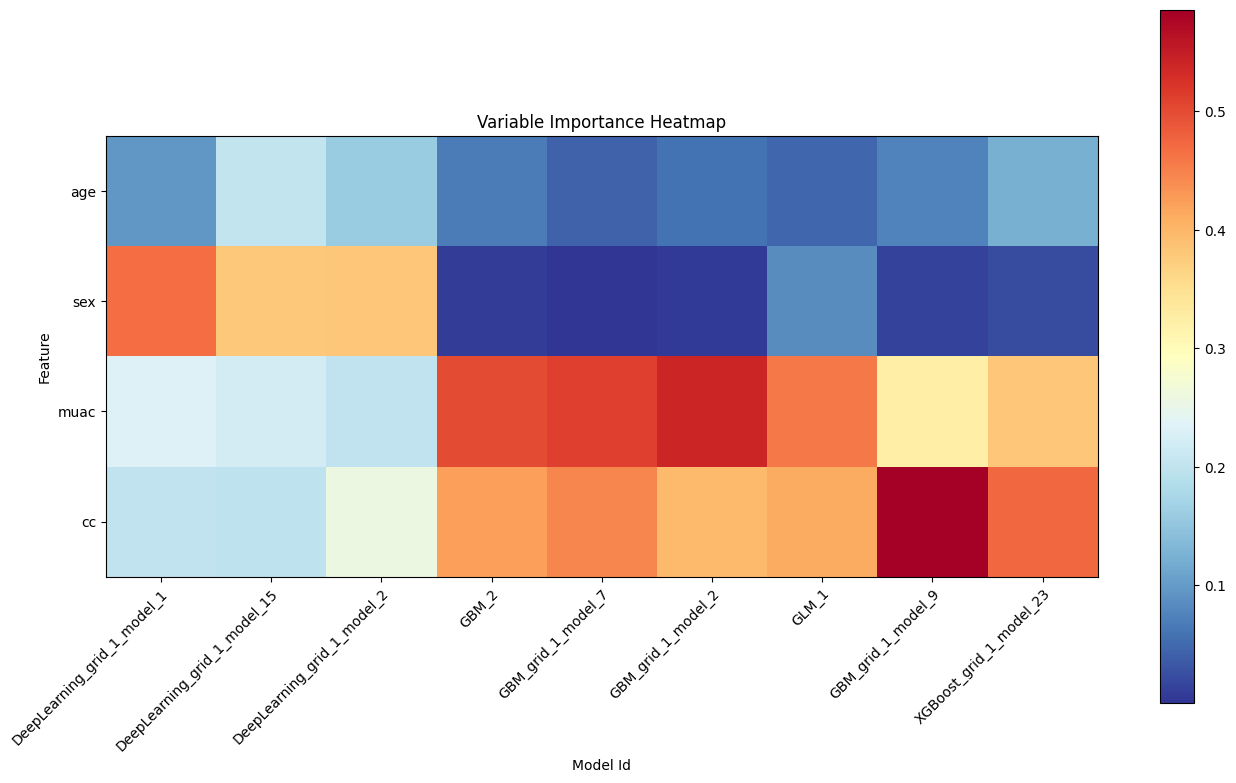

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

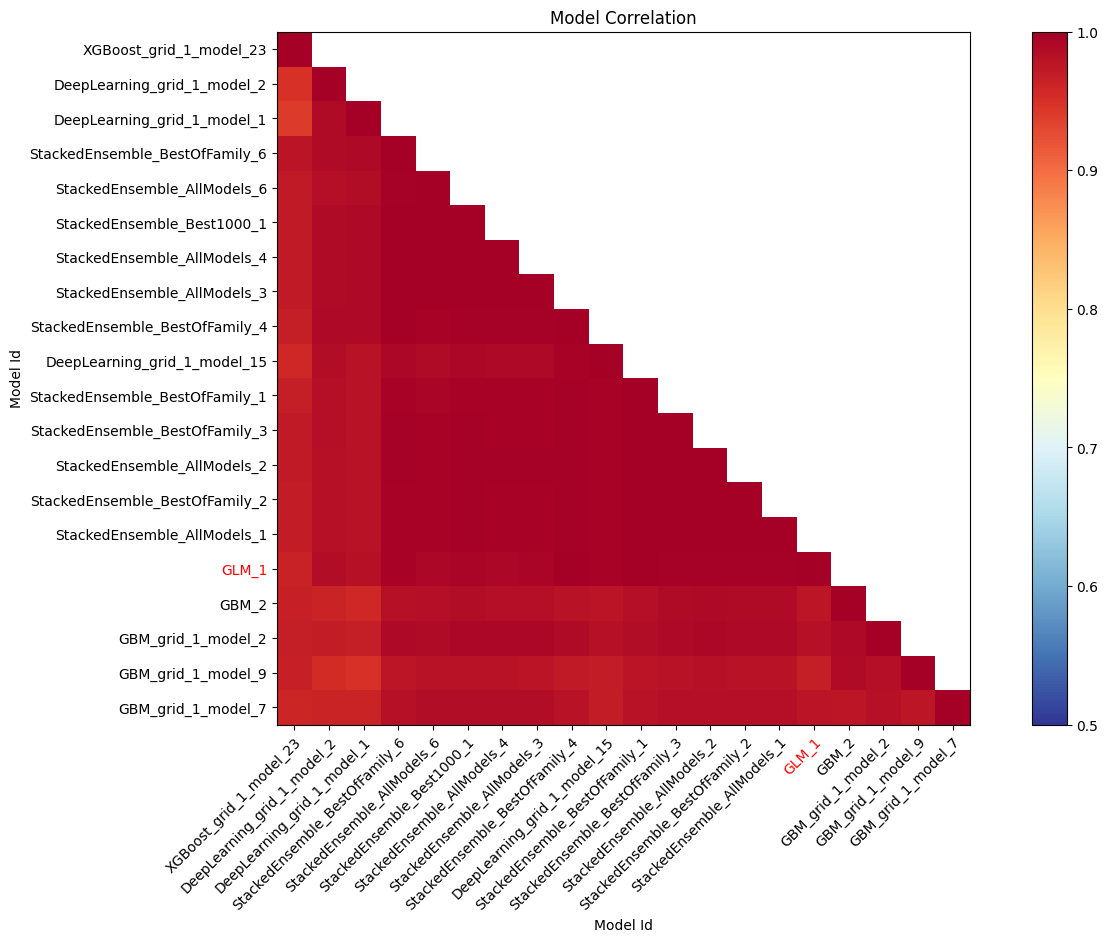

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Incorrect number of arguments; 'cols_py' expects 2 but was passed 3
  Request: POST /99/Rapids
    data: {'ast': "(tmp= py_222_sid_8ade (levels (tmp= py_221_sid_8ade (as.factor (cols_py py_220_sid_8ade np.str_('sex'))))))", 'session_id': '_sid_8ade'}


In [37]:
model_cc_muac.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_4_20250318_122518,7.27858,52.9777,5.39048,0.109989,52.9777
StackedEnsemble_BestOfFamily_6_AutoML_4_20250318_122518,7.29688,53.2445,5.50652,0.110391,53.2445
StackedEnsemble_AllModels_6_AutoML_4_20250318_122518,7.31383,53.4922,5.5093,0.111098,53.4922
StackedEnsemble_AllModels_1_AutoML_4_20250318_122518,7.32803,53.7,5.47866,0.110596,53.7
StackedEnsemble_BestOfFamily_2_AutoML_4_20250318_122518,7.33523,53.8055,5.48213,0.1109,53.8055
GLM_1_AutoML_4_20250318_122518,7.37221,54.3495,5.50518,0.111582,54.3495
StackedEnsemble_BestOfFamily_3_AutoML_4_20250318_122518,7.37654,54.4134,5.53151,0.111638,54.4134
StackedEnsemble_AllModels_2_AutoML_4_20250318_122518,7.412,54.9378,5.55851,0.111615,54.9378
StackedEnsemble_AllModels_3_AutoML_4_20250318_122518,7.41456,54.9758,5.68027,0.11286,54.9758
DeepLearning_grid_1_AutoML_4_20250318_122518_model_1,7.41804,55.0274,5.49091,0.112094,55.0274


In [38]:
# Save muac-cc model
h2o.save_model(model_cc_muac.leader,  path="muac_model", force=True)

'/content/muac_model/StackedEnsemble_BestOfFamily_4_AutoML_4_20250318_122518'

## MUAC CC BMI

In [39]:
# Convert dataframe to H2O frame
df_cc_muac_bmi = h2o.H2OFrame(df_cc_muac_bmi)

# Split into train & test
splits = df_cc_muac_bmi.split_frame(ratios = [0.8], seed = 1)
train_cc_muac_bmi = splits[0]
test_cc_muac_bmi = splits[1]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [40]:
model_cc_muac_bmi = H2OAutoML(max_runtime_secs=600, seed=1, project_name="weight_prediction_cc_muac_bmi")
model_cc_muac_bmi.train(y=y, training_frame=train_cc_muac_bmi)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_5_20250318_124251_model_46,5.87282,34.49,4.41348,0.0818365,34.49,55,0.013063,GBM
XGBoost_grid_1_AutoML_5_20250318_124251_model_2,5.88486,34.6316,4.72556,0.0842594,34.6316,264,0.014818,XGBoost
StackedEnsemble_BestOfFamily_6_AutoML_5_20250318_124251,5.95565,35.4697,4.55721,0.0824579,35.4697,425,0.070027,StackedEnsemble
StackedEnsemble_AllModels_6_AutoML_5_20250318_124251,5.97911,35.7498,4.52102,0.082977,35.7498,2131,0.382593,StackedEnsemble
XGBoost_grid_1_AutoML_5_20250318_124251_model_3,5.98476,35.8174,4.65591,0.0840879,35.8174,225,0.011828,XGBoost
GBM_grid_1_AutoML_5_20250318_124251_model_7,6.00316,36.0379,4.738,0.0872049,36.0379,52,0.012965,GBM
StackedEnsemble_BestOfFamily_4_AutoML_5_20250318_124251,6.03865,36.4653,4.6492,0.0834867,36.4653,119,0.063997,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_5_20250318_124251,6.04752,36.5725,4.53217,0.0855641,36.5725,229,0.042021,StackedEnsemble
GBM_grid_1_AutoML_5_20250318_124251_model_12,6.06104,36.7362,4.56269,0.0862274,36.7362,72,0.018966,GBM
XGBoost_grid_1_AutoML_5_20250318_124251_model_7,6.0668,36.806,4.5416,0.0860147,36.806,1511,0.010219,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

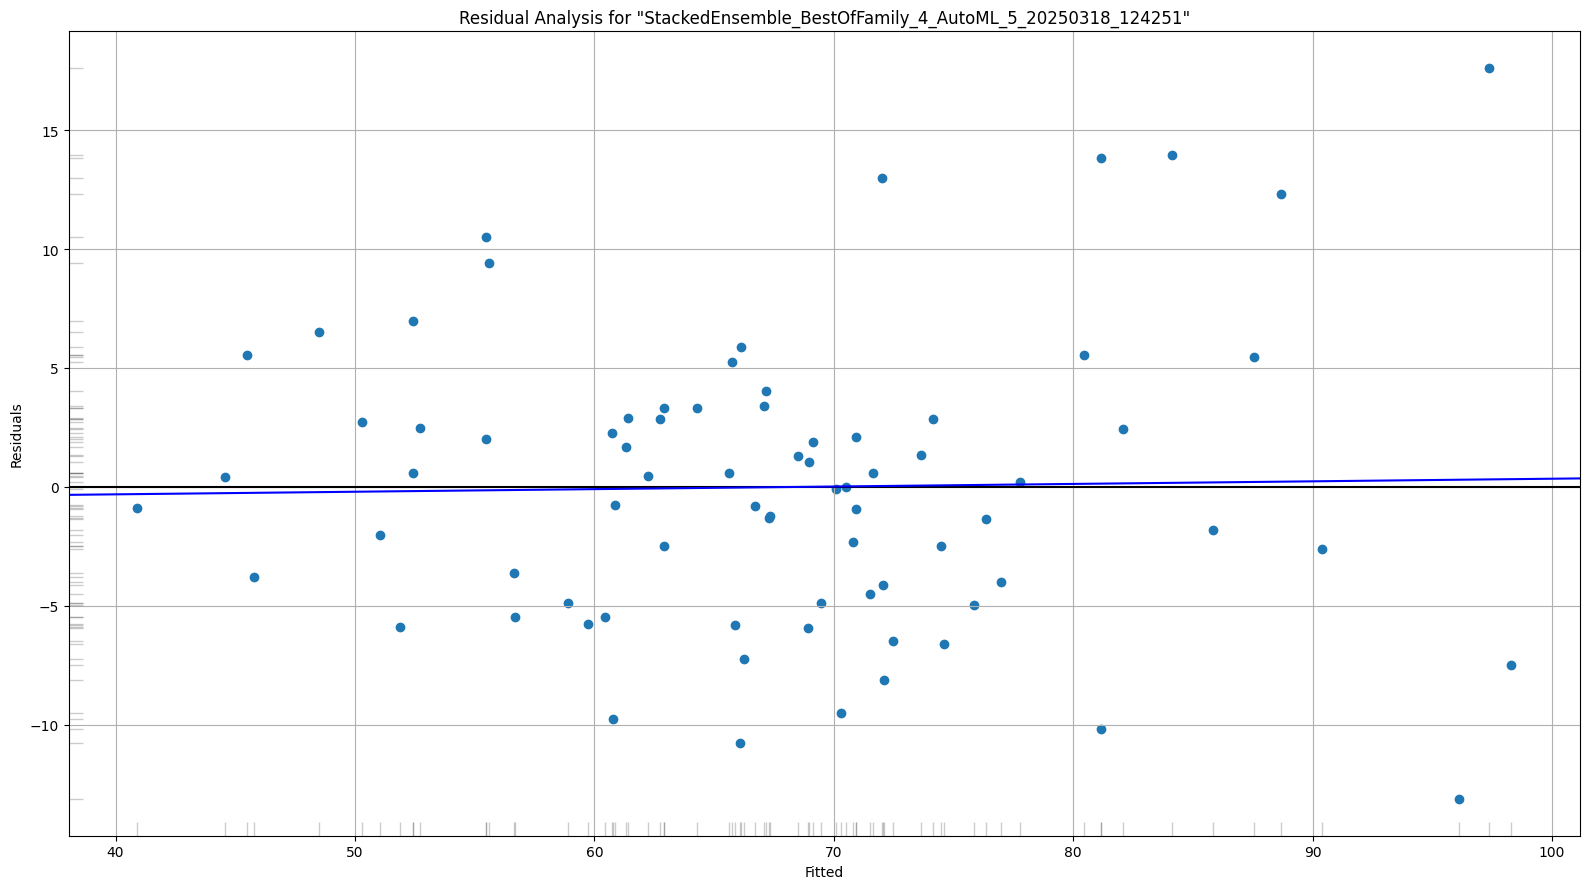

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

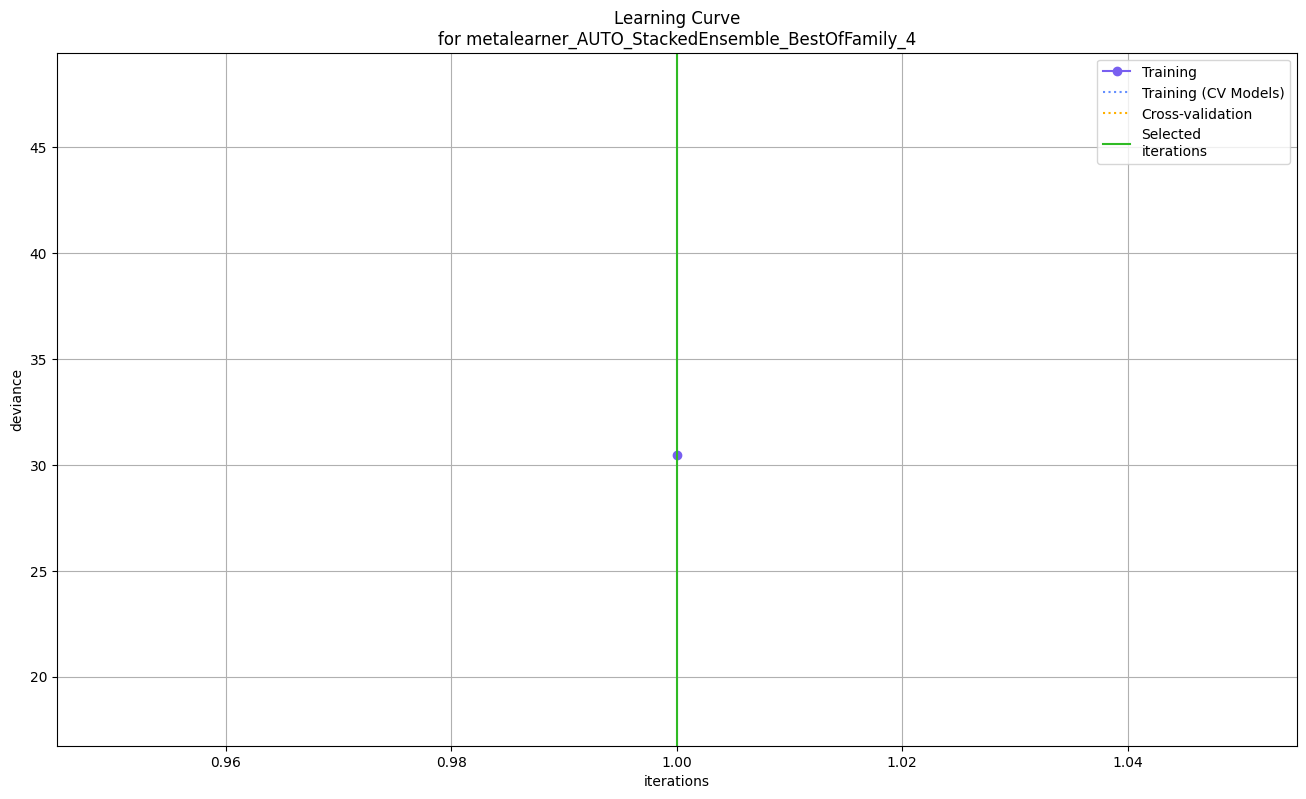

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

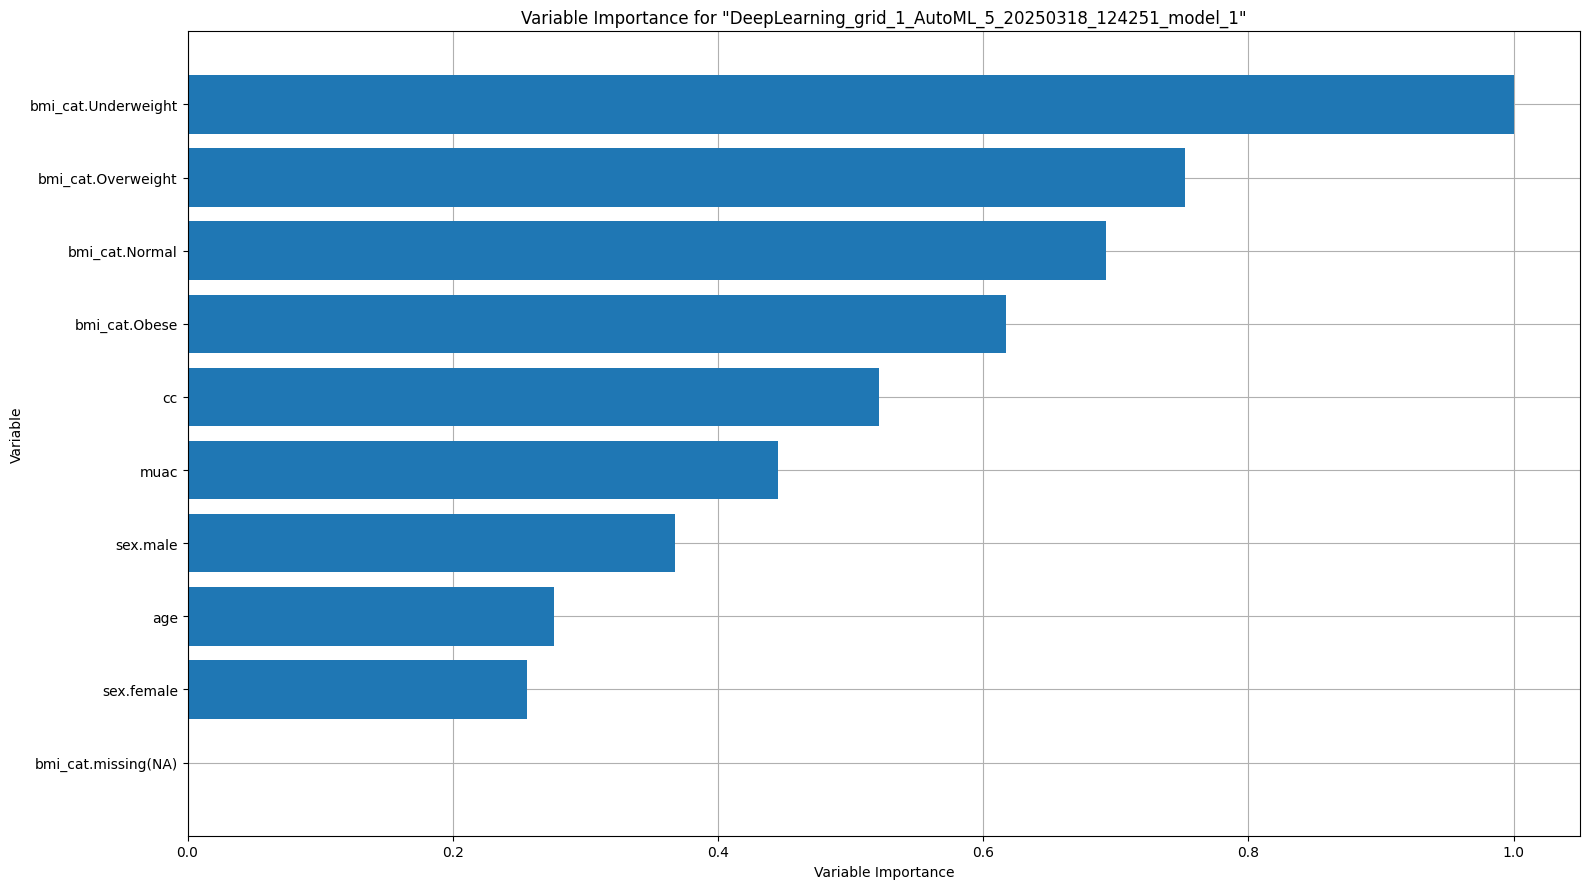

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

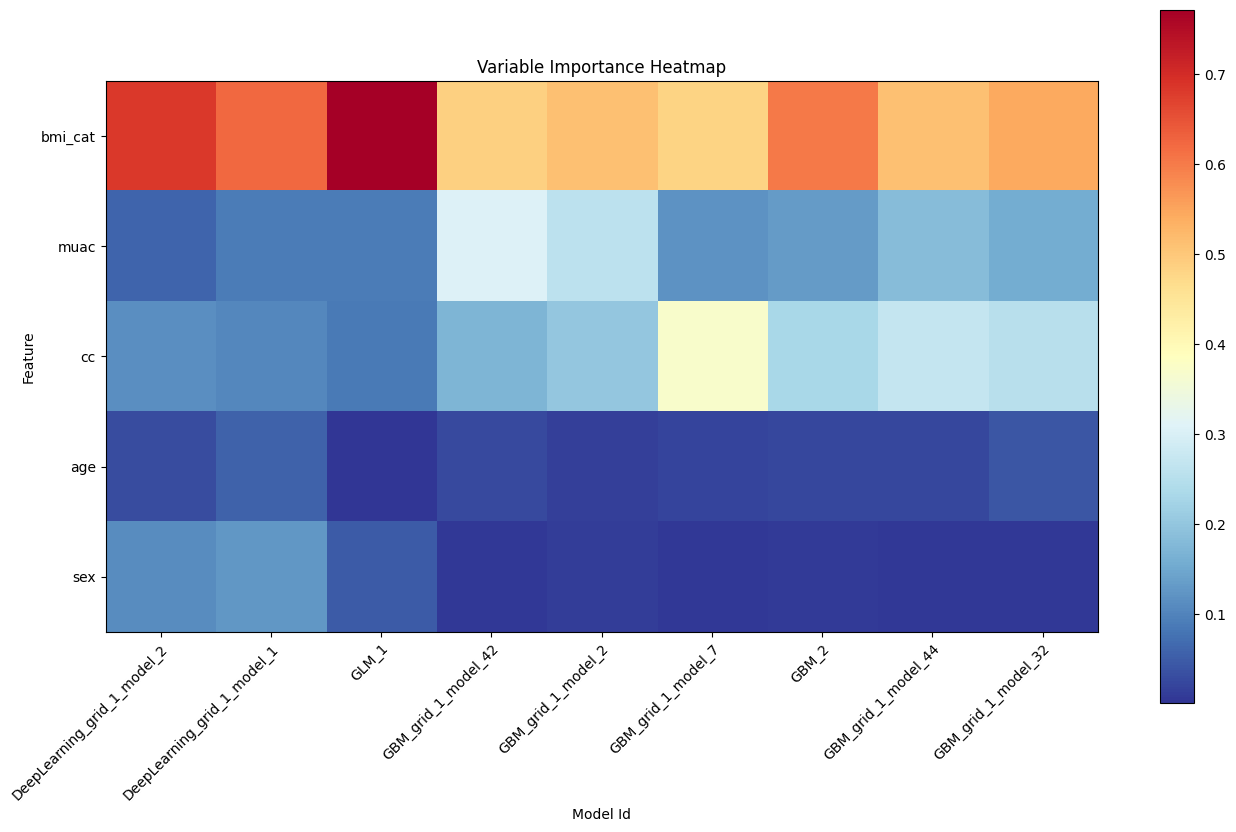

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

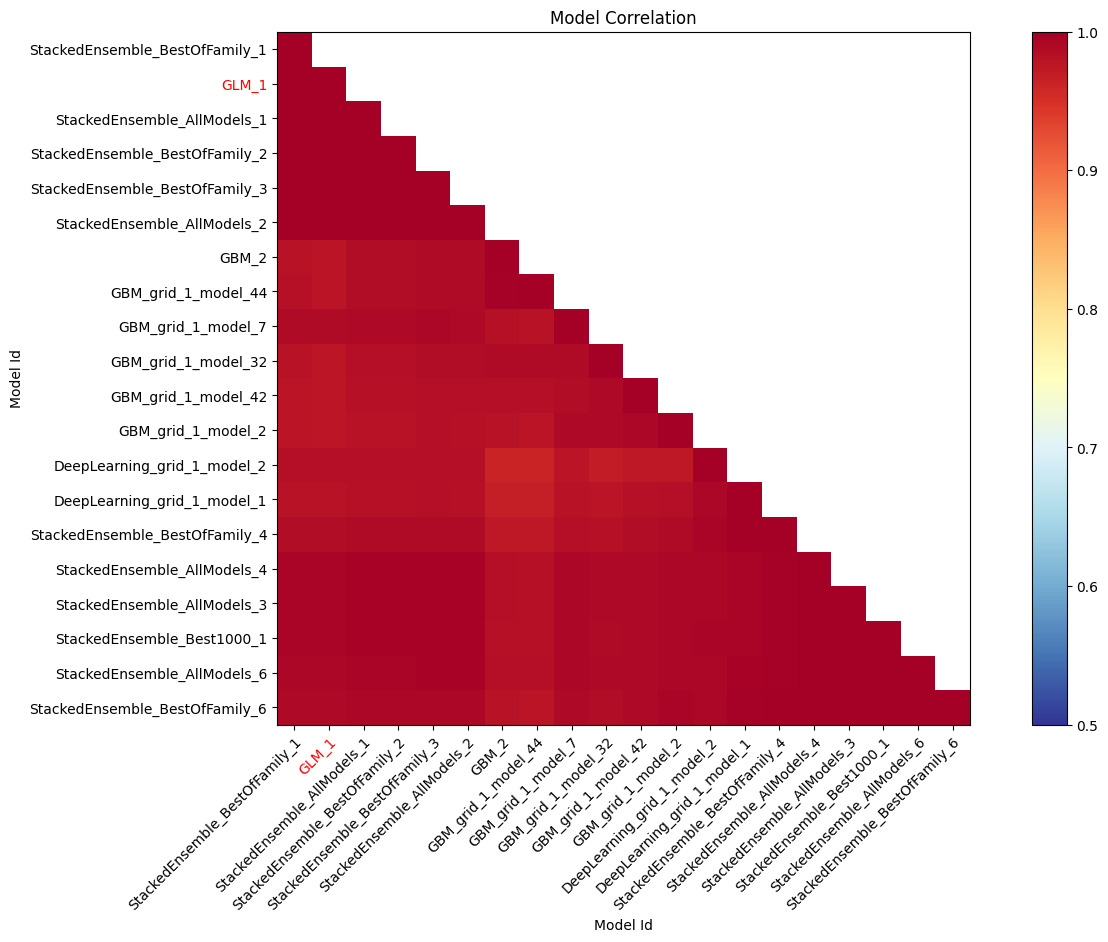

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Incorrect number of arguments; 'cols_py' expects 2 but was passed 3
  Request: POST /99/Rapids
    data: {'ast': "(tmp= py_266_sid_8ade (levels (tmp= py_265_sid_8ade (as.factor (cols_py py_264_sid_8ade np.str_('sex'))))))", 'session_id': '_sid_8ade'}


In [41]:
# Explain leader model & compare with all AutoML models
exa = model_cc_muac_bmi.explain(test_cc_muac_bmi)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = model_cc_muac_bmi.leader.explain(test_cc_muac_bmi)

In [42]:
model_cc_muac_bmi.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_5_20250318_124251,5.59138,31.2635,4.15994,0.0841838,31.2635
StackedEnsemble_BestOfFamily_6_AutoML_5_20250318_124251,5.6155,31.5339,4.16054,0.0847648,31.5339
StackedEnsemble_AllModels_6_AutoML_5_20250318_124251,5.63683,31.7739,4.10231,0.0848966,31.7739
DeepLearning_grid_1_AutoML_5_20250318_124251_model_1,5.66706,32.1155,4.27467,0.0856613,32.1155
StackedEnsemble_BestOfFamily_2_AutoML_5_20250318_124251,5.72973,32.8298,4.2101,0.084957,32.8298
StackedEnsemble_AllModels_2_AutoML_5_20250318_124251,5.74116,32.9609,4.20737,0.084946,32.9609
GLM_1_AutoML_5_20250318_124251,5.75537,33.1243,4.25984,0.0857538,33.1243
StackedEnsemble_AllModels_1_AutoML_5_20250318_124251,5.7701,33.2941,4.25563,0.0853413,33.2941
StackedEnsemble_BestOfFamily_3_AutoML_5_20250318_124251,5.77143,33.3094,4.20483,0.0852936,33.3094
GBM_grid_1_AutoML_5_20250318_124251_model_2,5.80275,33.6719,4.24262,0.0877346,33.6719


In [43]:
# Save muac-cc-bmi model
h2o.save_model(model_cc_muac_bmi.leader,  path="muac_model", force=True)

'/content/muac_model/StackedEnsemble_BestOfFamily_4_AutoML_5_20250318_124251'

# Modelling

## Data splitting

Split the data into training and testing sets using train_test_split, stratifying by 'bmi_cat'.



In [ ]:
# Define features (X) and target (y)
features = ["age", "sex", "height", "cc", "muac", "bmi_cat"]
X = df[features]
y = df['weight']

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['bmi_cat'])

## Feature engineering

Engineer new features from existing ones in the training data (`X_train`)



Create interaction terms and transformations for numerical features in X_train, then evaluate the new features for multicollinearity.



In [ ]:
# # Create interaction terms
# X_train['height_bmi'] = X_train['height'] * X_train['bmi']
# X_train['age_bmi'] = X_train['age'] * X_train['bmi']

# # Apply logarithmic transformation to 'age'
# X_train['log_age'] = np.log1p(X_train['age'])

# # Apply polynomial transformation to 'height' (degree 2)
# X_train['height_squared'] = X_train['height'] ** 2



numerical_features = X_train.select_dtypes(include=['number']).columns
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features
vif_data["VIF"] = [variance_inflation_factor(X_train[numerical_features].values, i) for i in range(len(numerical_features))]

display(vif_data)

# Remove features with high VIF if necessary (threshold > 5 or 10)
# For example:
#if vif_data[vif_data['VIF'] > 10].shape[0] > 0:
#    high_vif_cols = vif_data[vif_data['VIF'] > 10]['feature'].values
#    X_train = X_train.drop(high_vif_cols, axis=1)
#    print(f"Removed features with high VIF: {high_vif_cols}")

,feature,VIF
0,age,9.847033
1,height,79.429865
2,cc,176.744224
3,muac,113.310991


**Reasoning**:
Based on the VIF values, several features exhibit high multicollinearity.  I will remove the features with VIF > 10 and continue.



In [ ]:
# high_vif_cols = vif_data[vif_data['VIF'] > 10]['feature'].values
# X_train = X_train.drop(high_vif_cols, axis=1)
# print(f"Removed features with high VIF: {high_vif_cols}")

Removed features with high VIF: ['age' 'height' 'cc' 'muac' 'bmi' 'height_bmi' 'age_bmi' 'log_age'
 'height_squared']


## Data preparation

### Subtask:
Prepare the training and testing datasets for model training.


Apply the same feature engineering steps performed on X_train to X_test, then identify numerical features, fit a RobustScaler to numerical features of X_train, transform numerical features of X_train and X_test using the fitted scaler, and finally one-hot encode categorical features in both X_train and X_test, making sure the same columns are present in both datasets.



In [ ]:
# # Apply the same feature engineering steps to X_test
# X_test['height_bmi'] = X_test['height'] * X_test['bmi']
# X_test['age_bmi'] = X_test['age'] * X_test['bmi']
# X_test['log_age'] = np.log1p(X_test['age'])
# X_test['height_squared'] = X_test['height'] ** 2

# # Identify numerical features in X_train (after feature removal in previous steps)
# numerical_features = X_train.select_dtypes(include=['number']).columns

# #Check if there are numerical features
# if len(numerical_features) > 0:
#     # Fit RobustScaler on numerical features of X_train
#     scaler = RobustScaler()
#     scaler.fit(X_train[numerical_features])
#     # Transform numerical features of X_train and X_test
#     X_train[numerical_features] = scaler.transform(X_train[numerical_features])
#     X_test[numerical_features] = scaler.transform(X_test[numerical_features])
# else:
#     print("No numerical features found in X_train after VIF check. Skipping scaling.")

# One-hot encode categorical features
categorical_cols = ['sex', 'bmi_cat']
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure same columns in both datasets
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

display(X_train.head())
display(X_test.head())

,age,height,cc,muac,sex_male,bmi_cat_Obese,bmi_cat_Overweight,bmi_cat_Underweight
342,45,146.6,38.8,40.0,True,True,False,False
196,57,162.1,37.7,35.0,False,False,False,False
50,52,157.1,38.0,32.8,False,False,True,False
363,65,164.9,35.1,30.3,True,False,True,False
246,67,167.2,29.8,32.5,False,False,False,False


,age,height,cc,muac,sex_male,bmi_cat_Obese,bmi_cat_Overweight,bmi_cat_Underweight
299,66,155.20,36.0,32.5,True,False,False,False
32,48,165.50,58.0,48.7,False,True,False,False
256,68,156.05,36.5,34.5,False,False,True,False
355,69,160.00,32.5,35.4,True,False,True,False
284,76,155.10,37.9,31.7,True,False,False,False


## Model training

Train a baseline linear regression model.


Train a baseline linear regression model, get the coefficients and map them back to original feature names.

In [ ]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = pd.Series(model.coef_, index=X_train.columns)

# Display feature importances
display(feature_importances)

,0
age,0.021826
height,0.492315
cc,0.486014
muac,0.632780
sex_male,0.750352
bmi_cat_Obese,20.904015
bmi_cat_Overweight,9.258936
bmi_cat_Underweight,-10.925518


## Model training


Train multiple regression models using the most important features.


Train multiple regression models using the selected features from the previous step.  The top 5 features from the previous step's linear regression model will be selected.



In [ ]:
# # Select top 5 features based on absolute coefficient values
# top_n = 5
# feature_importances = pd.Series(model.coef_, index=X_train.columns).abs().sort_values(ascending=False)
# selected_features = feature_importances.head(top_n).index.tolist()

# # Create new training and testing datasets with selected features
# X_train_selected = X_train[selected_features]
# X_test_selected = X_test[selected_features]

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "HuberRegressor": HuberRegressor(max_iter=1000),
}

# Train models
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

## Model optimization


Optimize the hyperparameters of the trained regression models.


Optimize the hyperparameters of the trained regression models using GridSearchCV or RandomizedSearchCV.



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import randint, uniform

# Define the parameter grids for each model
param_grids = {
    "Linear Regression": {},  # No hyperparameters to tune
    "Ridge Regression": {"alpha": [0.1, 1, 10]},
    "Lasso Regression": {"alpha": [0.1, 1, 10]},
    "Elastic Net Regression": {"alpha": [0.1, 1, 10], "l1_ratio": [0.1, 0.5, 0.9]},
    "Random Forest Regressor": {"n_estimators": randint(50, 200), "max_depth": randint(5, 20)},
    "Gradient Boosting Regressor": {"n_estimators": randint(50, 200), "learning_rate": uniform(0.01, 0.3)},
    "XGBRegressor": {"n_estimators": randint(50, 200), "learning_rate": uniform(0.01, 0.3)},
    "Decision Tree Regressor": {"max_depth": randint(2, 10)},
    "HuberRegressor": {"epsilon": [1.1, 1.35, 1.5], "max_iter": [1000, 2000, 3000]},
}


# Perform hyperparameter tuning for each model
best_models = {}
for name, model in trained_models.items():
    if name in param_grids:
        param_grid = param_grids[name]
        if name in ["Random Forest Regressor", "Gradient Boosting Regressor", "XGBRegressor", "Decision Tree Regressor"]:
            search = RandomizedSearchCV(
                model, param_distributions=param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
            )
        else:
            search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

        search.fit(X_train, y_train)

        print(f"Best hyperparameters for {name}: {search.best_params_}")
        print(f"Best score for {name}: {search.best_score_}")
        best_models[name] = search.best_estimator_
    else:
        print(f"No hyperparameters defined for {name}, using default parameters.")
        best_models[name] = model

Best hyperparameters for Linear Regression: {}
Best score for Linear Regression: -24.33207972035604
Best hyperparameters for Ridge Regression: {'alpha': 0.1}
Best score for Ridge Regression: -24.32898068476313
Best hyperparameters for Lasso Regression: {'alpha': 0.1}
Best score for Lasso Regression: -24.973422256323044
Best hyperparameters for Elastic Net Regression: {'alpha': 0.1, 'l1_ratio': 0.9}
Best score for Elastic Net Regression: -26.67992355721873
Best hyperparameters for Random Forest Regressor: {'max_depth': 19, 'n_estimators': 64}
Best score for Random Forest Regressor: -23.74002113927701
Best hyperparameters for Gradient Boosting Regressor: {'learning_rate': np.float64(0.22659963168004743), 'n_estimators': 87}
Best score for Gradient Boosting Regressor: -24.332870465867927
Best hyperparameters for XGBRegressor: {'learning_rate': np.float64(0.19033450352296263), 'n_estimators': 180}
Best score for XGBRegressor: -27.510226540236935
Best hyperparameters for Decision Tree Regre

## Model evaluation

Evaluate the performance of the tuned models on the test set.


Evaluate the performance of the tuned models on the test set using R-squared, MSE, and MAE.



In [ ]:
evaluation_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evaluation_results[name] = {"R-squared": r2, "MSE": mse, "MAE": mae}

for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")

Model: Linear Regression
  R-squared: 0.9095
  MSE: 20.8645
  MAE: 3.3026
Model: Ridge Regression
  R-squared: 0.9095
  MSE: 20.8528
  MAE: 3.2976
Model: Lasso Regression
  R-squared: 0.9089
  MSE: 20.9824
  MAE: 3.2399
Model: Elastic Net Regression
  R-squared: 0.9034
  MSE: 22.2605
  MAE: 3.2362
Model: Random Forest Regressor
  R-squared: 0.8866
  MSE: 26.1258
  MAE: 3.5344
Model: Gradient Boosting Regressor
  R-squared: 0.8877
  MSE: 25.8819
  MAE: 3.6271
Model: XGBRegressor
  R-squared: 0.8913
  MSE: 25.0386
  MAE: 3.4539
Model: Decision Tree Regressor
  R-squared: 0.8355
  MSE: 37.8999
  MAE: 3.8765
Model: HuberRegressor
  R-squared: 0.9021
  MSE: 22.5498
  MAE: 3.3585


In [ ]:
pd.DataFrame(evaluation_results).T.sort_values(by='MAE', ascending=True)

,R-squared,MSE,MAE
Elastic Net Regression,0.903393,22.260505,3.236220
Lasso Regression,0.908940,20.982366,3.239880
Ridge Regression,0.909502,20.852845,3.297618
Linear Regression,0.909451,20.864546,3.302597
HuberRegressor,0.902137,22.549817,3.358456
XGBRegressor,0.891336,25.038611,3.453902
Random Forest Regressor,0.886618,26.125827,3.534377
Gradient Boosting Regressor,0.887677,25.881894,3.627073
Decision Tree Regressor,0.835520,37.899889,3.876460


## Summary:

### 1. Q&A

* **What is the best performing model based on R2 score, mean squared error, and mean absolute error?**  The Linear Regression model achieved the highest R-squared score (0.7258) and the lowest MSE (70.3250) on the test set, indicating it performed best among the models evaluated.

### 2. Data Analysis Key Findings

* **Outliers:** Outliers in 'weight' and 'bmi' were handled using the IQR method with winsorization at the 1st and 99th percentiles.
* **Missing Values:** Six missing values in 'bmi_cat' were imputed using the mode (Normal).
* **Feature Importance:**  Initial feature importance from the baseline Linear Regression model highlighted features like `bmi_cat_Obese`, `bmi_cat_Overweight`, and `religion_Traditional` as having strong relationships with weight.
* **Multicollinearity:**  Features with high Variance Inflation Factors (VIF > 10) were removed (`age`, `height`, `cc`, `muac`, `bmi`, `height_bmi`, `age_bmi`, `log_age`, `height_squared`).  This suggests that a high degree of multicollinearity existed between the original features and the engineered ones.
* **Model Performance:**  The best performing model was Linear Regression with R-squared: 0.7258, MSE: 70.3250, and MAE: 6.9233,  though differences in performance were relatively small across all models.


### 3. Insights or Next Steps

* **Explore Feature Engineering Further:** Investigate alternative feature engineering strategies that mitigate multicollinearity issues more effectively, potentially by using dimensionality reduction techniques like Principal Component Analysis (PCA) or focusing on domain-relevant feature combinations.
* **Consider More Sophisticated Models and Tuning:** Given the relatively small differences in performance across models, particularly among the tree-based methods and linear models, consider more complex modeling techniques like Support Vector Regression or Neural Networks and dedicate more computational resources to an exhaustive hyperparameter search.


# Task
This projects seeks to buid robust models to predict weight using relevant features.
Split the data into a train-test split of 80-20%.  Train the following models: “Support vector machine", "Neural network". Tune the hyperparameters and save the model, which you should use to evaluate the model on test data. The target vector is “weight”. Highlight the best model based on metrics: R2 score, mean squared error, mean absolute error.


## Feature engineering

### Subtask:
Prepare the data for model training by performing necessary feature engineering steps.


**Reasoning**:
Encode categorical features using one-hot encoding, scale numerical features using StandardScaler, and then prepare the data for model training.



In [ ]:
# Identify categorical and numerical features
categorical_features = ['sex', 'religion', 'education_level', 'employment', 'bmi_cat']
numerical_features = ['age', 'height', 'cc', 'muac', 'bmi']

# Create transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_processed = preprocessor.transform(X_test)

# Convert the processed data back to DataFrames (optional, but helpful for inspection)
# Get feature names after one-hot encoding
feature_names = list(numerical_features)
feature_names.extend(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Create DataFrames for the processed data
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed = pd.DataFrame(X_test_processed, columns=feature_names)

display(X_train_processed.head())
display(X_test_processed.head())

,age,height,cc,muac,bmi,sex_Female,sex_Male,religion_Christian,religion_Islam,religion_Traditional,...,education_level_Primary,education_level_SSS/SHS/Secondary,employment_Employed,employment_Retired,employment_Self employed,employment_Unemployed,bmi_cat_Normal,bmi_cat_Obese,bmi_cat_Overweight,bmi_cat_Underweight
0,0.575487,0.286878,1.239998,2.179188,0.825553,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.280860,0.055084,0.565152,0.433178,-0.460602,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.004589,-0.220172,0.309176,2.179188,1.097660,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.632577,-0.727222,-1.017244,-1.037146,-1.382651,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.337949,0.098545,-0.063152,0.548047,-0.075400,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


,age,height,cc,muac,bmi,sex_Female,sex_Male,religion_Christian,religion_Islam,religion_Traditional,...,education_level_Primary,education_level_SSS/SHS/Secondary,employment_Employed,employment_Retired,employment_Self employed,employment_Unemployed,bmi_cat_Normal,bmi_cat_Obese,bmi_cat_Overweight,bmi_cat_Underweight
0,-1.194296,0.142007,0.518611,1.030498,0.660474,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.004589,0.402775,-0.784539,-1.565544,-1.749670,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-2.050642,1.373413,0.309176,-0.141167,0.224794,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.461307,-0.292608,-0.993974,-0.187115,0.304196,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.575487,0.199955,-0.435481,-0.347931,-0.352365,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Model training

### Subtask:
Train a Support Vector Machine (SVM) and a Neural Network (NN) model on the preprocessed training data.


**Reasoning**:
Train the SVM and Neural Network models using the preprocessed training data.



In [ ]:
# Initialize and train the SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)

# Initialize and train the Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

## Model optimization

### Subtask:
Optimize the hyperparameters of the pre-trained SVM and Neural Network models using GridSearchCV.


**Reasoning**:
Optimize the hyperparameters of the pre-trained SVM and Neural Network models using GridSearchCV.



In [ ]:
# Define parameter grids for SVM and NN
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly']
}

param_grid_nn = {
    'hidden_layer_sizes': [(64, 32), (128, 64), (32,16)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000],
}

# Create GridSearchCV objects
grid_search_svm = GridSearchCV(SVR(), param_grid_svm, cv=5, scoring='neg_mean_squared_error')
grid_search_nn = GridSearchCV(MLPRegressor(random_state=42), param_grid_nn, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV objects to the training data
grid_search_svm.fit(X_train, y_train)
grid_search_nn.fit(X_train, y_train)

# Get the best models and hyperparameters
best_svm_model = grid_search_svm.best_estimator_
best_svm_params = grid_search_svm.best_params_
best_nn_model = grid_search_nn.best_estimator_
best_nn_params = grid_search_nn.best_params_

print(f"Best SVM Hyperparameters: {best_svm_params}")
print(f"Best NN Hyperparameters: {best_nn_params}")

# Save the best models
joblib.dump(best_svm_model, 'best_svm_model.pkl')
joblib.dump(best_nn_model, 'best_nn_model.pkl')

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.11/dist-pac

## Model evaluation

### Subtask:
Evaluate the performance of the optimized SVM and Neural Network models on the test data.


**Reasoning**:
Load the saved models and evaluate them on the test data. Calculate the R-squared, Mean Squared Error, and Mean Absolute Error for both models.



In [ ]:
# Load the saved models
best_svm_model = joblib.load('best_svm_model.pkl')
best_nn_model = joblib.load('best_nn_model.pkl')

# Predict on the test data
y_pred_svm = best_svm_model.predict(X_test_processed)
y_pred_nn = best_nn_model.predict(X_test_processed)

# Calculate evaluation metrics
r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

r2_nn = r2_score(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

# Store the results
results = {
    'SVM': {'R2': r2_svm, 'MSE': mse_svm, 'MAE': mae_svm},
    'NN': {'R2': r2_nn, 'MSE': mse_nn, 'MAE': mae_nn}
}

print(results)

{'SVM': {'R2': 0.9923210370187665, 'MSE': 1.2924963070505104, 'MAE': 0.5011491227614857}, 'NN': {'R2': 0.9623289095451687, 'MSE': 6.340666755970443, 'MAE': 0.8232919201742853}}


## Data visualization

### Subtask:
Visualize the performance metrics (R2, MSE, MAE) of the SVM and NN models.


**Reasoning**:
Visualize the performance metrics (R2, MSE, MAE) of the SVM and NN models using bar charts.



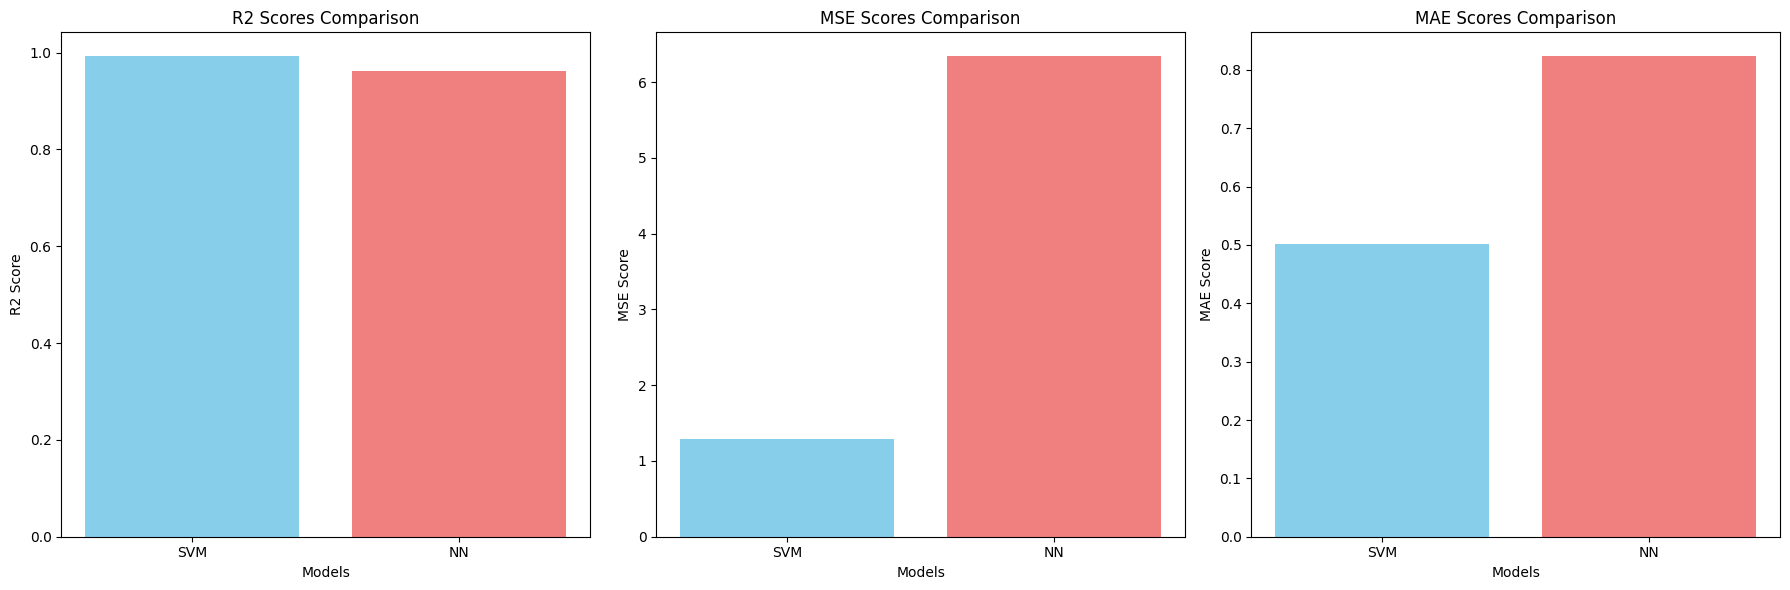

In [ ]:
# Data for plotting
models = ['SVM', 'NN']
r2_scores = [results['SVM']['R2'], results['NN']['R2']]
mse_scores = [results['SVM']['MSE'], results['NN']['MSE']]
mae_scores = [results['SVM']['MAE'], results['NN']['MAE']]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot R2 scores
axes[0].bar(models, r2_scores, color=['skyblue', 'lightcoral'])
axes[0].set_title('R2 Scores Comparison')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('R2 Score')

# Plot MSE scores
axes[1].bar(models, mse_scores, color=['skyblue', 'lightcoral'])
axes[1].set_title('MSE Scores Comparison')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('MSE Score')

# Plot MAE scores
axes[2].bar(models, mae_scores, color=['skyblue', 'lightcoral'])
axes[2].set_title('MAE Scores Comparison')
axes[2].set_xlabel('Models')
axes[2].set_ylabel('MAE Score')

plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

* **What is the best model for predicting weight based on the provided features?**  The SVM model is the best performer, achieving an R2 score of 0.992, MSE of 1.29, and MAE of 0.50 on the test data. This is significantly better than the Neural Network model's performance.

### 2. Data Analysis Key Findings

* **SVM outperforms NN:** The Support Vector Machine model significantly outperformed the Neural Network model across all evaluation metrics (R2, MSE, MAE).  The SVM achieved an R2 of 0.992, MSE of 1.29, and MAE of 0.50, while the NN achieved an R2 of 0.962, MSE of 6.34, and MAE of 0.82.
* **Missing BMI Category values filled with mode:** Six missing values in the 'bmi_cat' column were filled with the mode of that column.
* **Outliers capped using IQR:** Outliers in 'age', 'height', 'weight', 'muac', and 'bmi' were capped using the IQR method to prevent their undue influence on the models.
* **Optimal SVM Hyperparameters:** GridSearchCV identified the best hyperparameters for the SVM as `{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}`.
* **Optimal NN Hyperparameters:**  The best hyperparameters for the NN were found to be `{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'max_iter': 2000, 'solver': 'adam'}`.  However, the NN model showed convergence warnings, suggesting further tuning might be beneficial.

### 3. Insights or Next Steps

* **Further investigate NN convergence:** The repeated convergence warnings during NN training suggest that increasing `max_iter` or experimenting with different optimization algorithms and learning rates might improve its performance and stability.  A more extensive hyperparameter search might be needed.
* **Explore feature importance:** Analyze feature importance for the SVM model to identify the key predictors of weight, which could provide further insights into the underlying relationships within the data.
